<a href="https://www.kaggle.com/code/thirumani/dragons-den-uk-data-analysis?scriptVersionId=258710752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:maroon;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;"> 🇬🇧 Dragons' Den UK Exploratory Data Analysis (EDA) 🐉</p>
## Dataset https://www.kaggle.com/datasets/thirumani/dragons-den-uk-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2025-Aug-28 with Python version
Python 3.11.13


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/9/99/DragonsDenUK17.png', width=430, height=240)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/dragons-den-uk-dataset/
dragons_den = pd.read_csv('/kaggle/input/dragons-den-uk-dataset/Dragons Den UK dataset.csv', encoding = "utf-8")

nRow, nCol = dragons_den.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 296
-rw-r--r-- 1 nobody nogroup 299980 Aug 28 14:10 'Dragons Den UK dataset.csv'

There are 1473 rows and 56 columns in the dataset


## SharkTank US/America data analysis https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis

## 💵 Exploratory Data Analysis (EDA)

In [5]:
dragons_den.head(5)

Season Number  Episode Number          Startup Name  Pitch Number  \
0              1               1           ArtOutThere             1   
1              1               1      BabyDreamMachine             2   
2              1               1            BlowDryBar             3   
3              1               1            EmandJoLtd             4   
4              1               1  EthicalClothingRange             5   

  Season Start Season End Original Air Date                 Industry  \
0     4-Jan-05   8-Feb-05          4-Jan-05  Fitness/Sports/Outdoors   
1     4-Jan-05   8-Feb-05          4-Jan-05       Children/Education   
2     4-Jan-05   8-Feb-05          4-Jan-05           Fashion/Beauty   
3     4-Jan-05   8-Feb-05          4-Jan-05           Fashion/Beauty   
4     4-Jan-05   8-Feb-05          4-Jan-05           Fashion/Beauty   

                              Business Description  \
0  An annual arts and music, outdoor weekend event   
1                        Aid for rocking baby cots   
2    Hairdressing salon offering blow-dry services   
3              Womenswear, fashion and accessories   
4                   Ethical clothing fashion range   

                     Company Website  UK Viewership Channel Name  \
0                                NaN            NaN      BBC Two   
1  https://www.babydreammachine.com/            NaN      BBC Two   
2                                NaN            NaN      BBC Two   
3                                NaN            NaN      BBC Two   
4                                NaN            NaN      BBC Two   

  Pitchers Gender Pitchers Average Age Pitchers City  Pitchers State  \
0             NaN                  NaN           NaN             NaN   
1             NaN                  NaN           NaN             NaN   
2             NaN                  NaN           NaN             NaN   
3             NaN                  NaN           NaN             NaN   
4             NaN                  NaN           NaN             NaN   

                   Entrepreneur Names  Multiple Entrepreneurs  \
0                         Gavin Drake                       0   
1       Graham Whitby and Barry Haigh                       1   
2                       Rachel Fiddes                       0   
3  Joanne Morrison and Emma McPherson                       1   
4                        Jeremy Davis                       0   

   Original Ask Amount  Original Offered Equity  Valuation Requested  \
0             100000.0                     49.0             204082.0   
1             250000.0                      NaN                  NaN   
2              60000.0                      NaN                  NaN   
3              60000.0                     20.0             300000.0   
4                  NaN                      NaN                  NaN   

   Received Offer  Accepted Offer  Deal Successful  Total Deal Amount  ...  \
0               0             NaN              NaN                NaN  ...   
1               0             NaN              NaN                NaN  ...   
2               0             NaN              NaN                NaN  ...   
3               0             NaN              NaN                NaN  ...   
4               0             NaN              NaN                NaN  ...   

   Advisory Shares Equity  Loan  Deal Has Conditions  \
0                     NaN   NaN                  NaN   
1                     NaN   NaN                  NaN   
2                     NaN   NaN                  NaN   
3                     NaN   NaN                  NaN   
4                     NaN   NaN                  NaN   

   Peter Jones Investment Amount  Peter Jones Investment Equity  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4    

In [6]:
dragons_den.tail(10).T

1463  \
Season Number                                                   22   
Episode Number                                                   7   
Startup Name                                 LumberjaxeFoodCompany   
Pitch Number                                                  1464   
Season Start                                              9-Jan-25   
Season End                                                     NaN   
Original Air Date                                        20-Feb-25   
Industry                                         Food and Beverage   
Business Description                Range of sauces and seasonings   
Company Website                                                NaN   
UK Viewership                                                  NaN   
Channel Name                                               BBC One   
Pitchers Gender                                                NaN   
Pitchers Average Age                                           NaN   
Pitchers City                                                  NaN   
Pitchers State                                                 NaN   
Entrepreneur Names                      Brendon and Jaydon Manders   
Multiple Entrepreneurs                                           1   
Original Ask Amount                                        90000.0   
Original Offered Equity                                       20.0   
Valuation Requested                                       450000.0   
Received Offer                                                   1   
Accepted Offer                                                 1.0   
Deal Successful                                                1.0   
Total Deal Amount                                          90000.0   
Total Deal Equity                                             20.0   
Deal Valuation                                            450000.0   
Number of Dragons in Deal                                      1.0   
Investment Amount Per Dragon                               90000.0   
Equity Per Dragon                                             20.0   
Royalty Deal                                                   NaN   
Advisory Shares Equity                                         NaN   
Loan                                                           NaN   
Deal Has Conditions                                            NaN   
Peter Jones Investment Amount                                  NaN   
Peter Jones Investment Equity                                  NaN   
Deborah Meaden Investment Amount                               NaN   
Deborah Meaden Investment Equity                               NaN   
Duncan Bannatyne Investment Amount                             NaN   
Duncan Bannatyne Investment Equity                             NaN   
Theo Paphitis Investment Amount                                NaN   
Theo Paphitis Investment Equity                                NaN   
Touker Suleyman Investment Amount                              NaN   
Touker Suleyman Investment Equity                              NaN   
Sara Davies Investment Amount                                  NaN   
Sara Davies Investment Equity                                  NaN   
Guest Investment Amount                                    90000.0   
Guest Investment Equity                                       20.0   
Invested Guest Name                                     Emma Grede   
Peter Jones Present                                            NaN   
Deborah Meaden Present                                         NaN   
Duncan Bannatyne Present                                       NaN   
Theo Paphitis Present                                          NaN   
Touker Suleyman Present                                        1.0   
Sara Davies Present                                            NaN   
Guest Present                                                  1.0   

                                                                  1464 

In [7]:
dragons_den['Season Number'] = dragons_den['Season Number'].astype(pd.Int32Dtype())
dragons_den['Episode Number'] = dragons_den['Episode Number'].astype(pd.Int32Dtype())
dragons_den['Pitch Number'] = dragons_den['Pitch Number'].astype(pd.Int32Dtype())

dragons_den['Startup Name'] = dragons_den['Startup Name'].astype(str)
dragons_den['Industry'] = dragons_den['Industry'].astype(str)
dragons_den['Business Description'] = dragons_den['Business Description'].astype(str)

dragons_den['Multiple Entrepreneurs'] = dragons_den['Multiple Entrepreneurs'].astype(pd.Int32Dtype())
dragons_den['Received Offer'] = dragons_den['Received Offer'].astype(pd.Int32Dtype())
dragons_den['Accepted Offer'] = dragons_den['Accepted Offer'].astype(pd.Int32Dtype())
dragons_den['Deal Successful'] = dragons_den['Deal Successful'].astype(pd.Int32Dtype())

In [8]:
dragons_den.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
dragons_den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1473 non-null   Int32  
 1   Episode Number                      1473 non-null   Int32  
 2   Startup Name                        1473 non-null   object 
 3   Pitch Number                        1473 non-null   Int32  
 4   Season Start                        1473 non-null   object 
 5   Season End                          1438 non-null   object 
 6   Original Air Date                   1473 non-null   object 
 7   Industry                            1473 non-null   object 
 8   Business Description                1473 non-null   object 
 9   Company Website                     59 non-null     object 
 10  UK Viewership                       1349 non-null   float64
 11  Channel Name                        1473 no

In [10]:
dragons_den.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in dragons_den.columns:
    print("Number of unique values in", col, "-", dragons_den[col].nunique())

Number of unique values in Season Number - 22
Number of unique values in Episode Number - 16
Number of unique values in Startup Name - 1459
Number of unique values in Pitch Number - 1473
Number of unique values in Season Start - 22
Number of unique values in Season End - 21
Number of unique values in Original Air Date - 248
Number of unique values in Industry - 16
Number of unique values in Business Description - 1469
Number of unique values in Company Website - 59
Number of unique values in UK Viewership - 143
Number of unique values in Channel Name - 2
Number of unique values in Pitchers Gender - 4
Number of unique values in Pitchers Average Age - 3
Number of unique values in Pitchers City - 2
Number of unique values in Pitchers State - 0
Number of unique values in Entrepreneur Names - 1466
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in Original Ask Amount - 77
Number of unique values in Original Offered Equity - 50
Number of unique values in Valuati

In [12]:
# Latest/current season data
dragons_den_recent = dragons_den.loc[(dragons_den['Season Number']==22)]

In [13]:
# Data set information
print(dragons_den['Season Number'].max(), "total series/seasons in UK Dragons' Den")
print(dragons_den.groupby('Season Number')['Episode Number'].max().sum(), "total episodes, in all Dragons' Denk UK series")
print(dragons_den['Pitch Number'].max(), "#startups came for pitching \n")

22 total series/seasons in UK Dragons' Den
247 total episodes, in all Dragons' Denk UK series
1473 #startups came for pitching 



Season Number   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
Episode Number   6   6   8   6   9   8   8  10  10  13  12  12  15  16  14   

Season Number   16  17  18  19  20  21  22  
Episode Number  15  14  14  14  14  14   9  


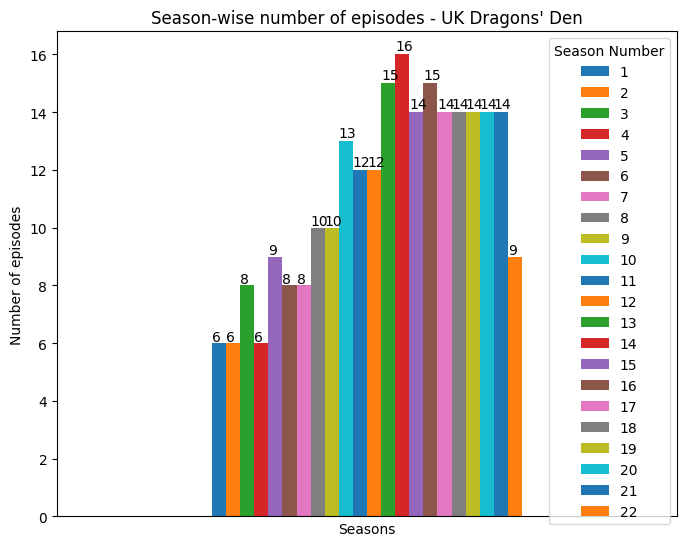

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(dragons_den, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(8,6.3), title="Season-wise number of episodes - UK Dragons' Den")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [15]:
# Season-wise number of pitches
tmp = dragons_den['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Dragons' Den UK - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=510, height=680)
fig.update_yaxes(tickvals=list(range(23)))
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [16]:
# There were 2 to 12 pitches, in a each episode
print(dragons_den[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[ 2  3  4  5  6  7  8  9 10 11 12]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = dragons_den['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Dragons' Den British - Industry wise startups (in all seasons)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [18]:
# Types of industries, came for investment, in current/latest season (22nd series)
tmp = dragons_den_recent['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> UK Dragons' Den in current/latest season (22nd series) - Industry wise startups</b>", template='simple_white', text=tmp, width=820, height=650)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [19]:
# All seasons averages
pivot = pd.pivot_table(dragons_den, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

# Amount & Valuation is in GBP and equity in %

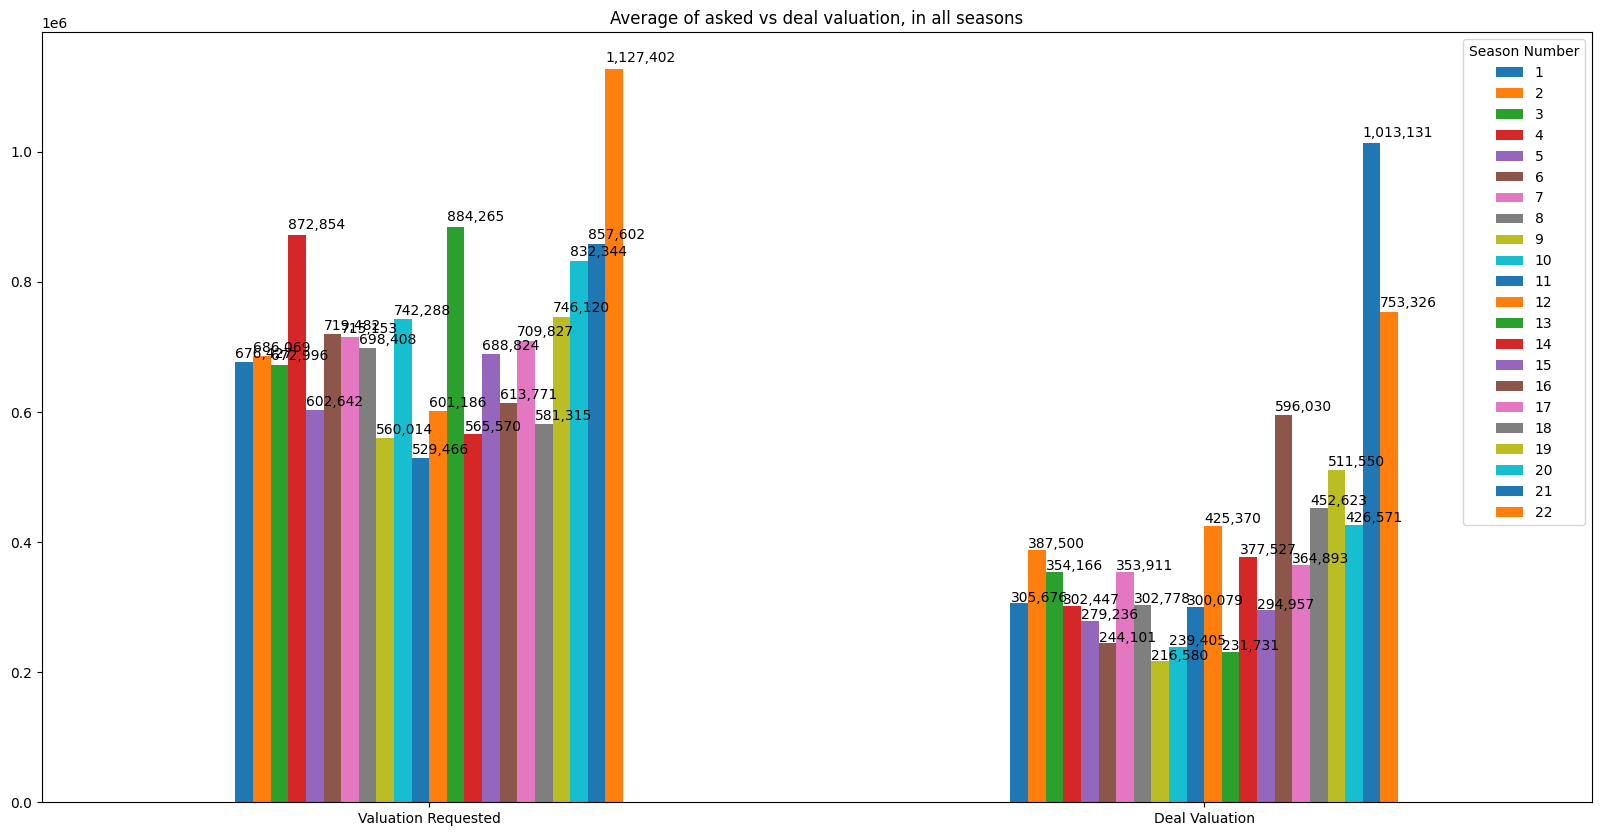

In [20]:
# All seasons average of offered/deal valuation
ax = pd.pivot_table(dragons_den, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(20,10), title="Average of asked vs deal valuation, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

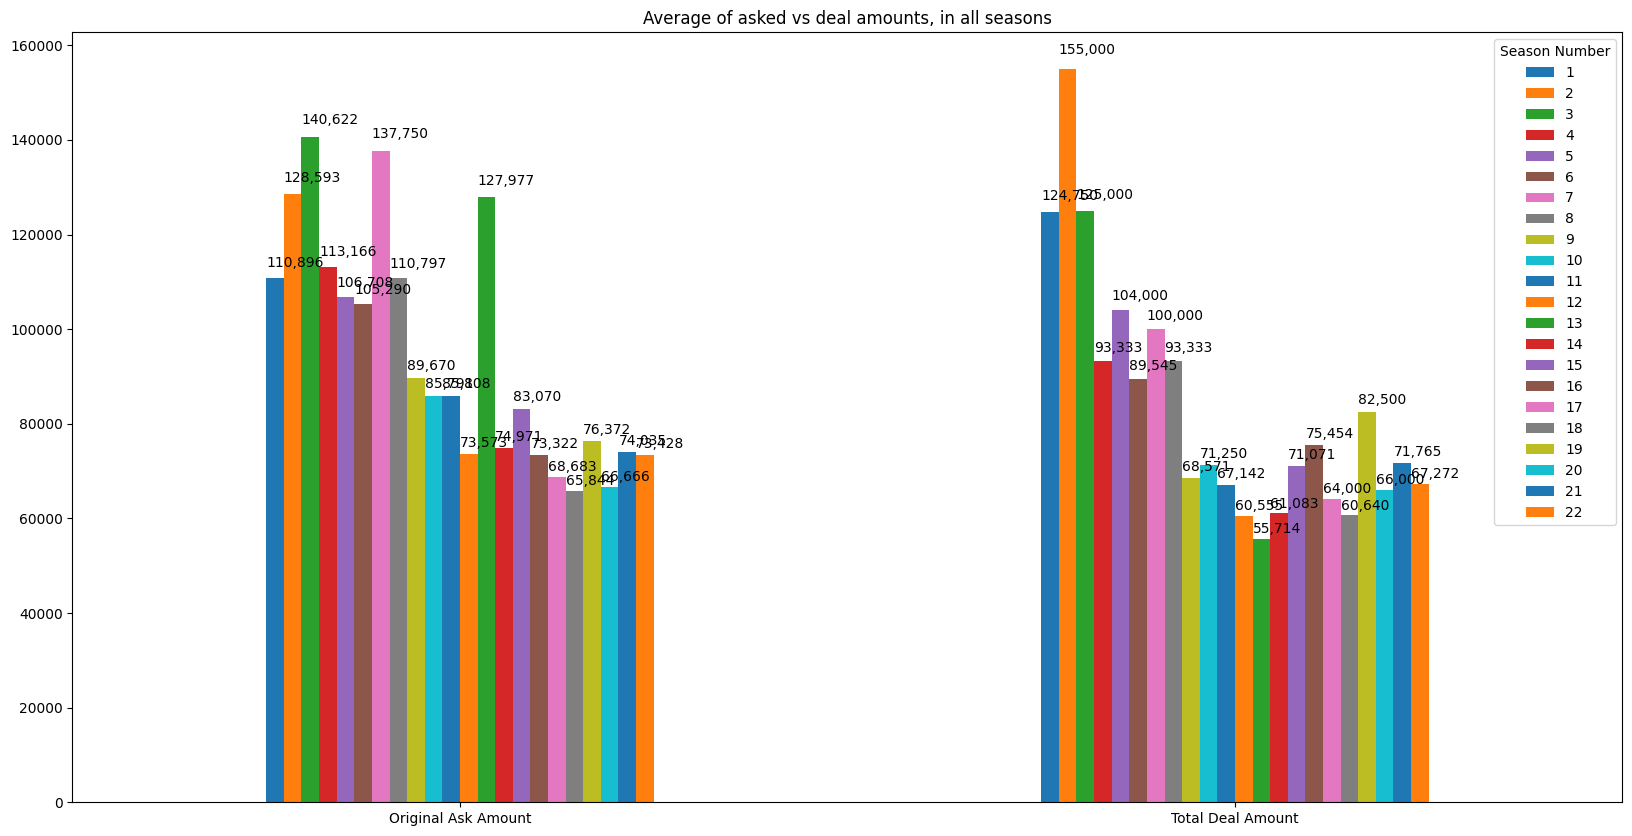

In [21]:
# All seasons average of offered/deal amounts
ax = pd.pivot_table(dragons_den, values=['Original Ask Amount','Total Deal Amount'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(20,10), title="Average of asked vs deal amounts, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

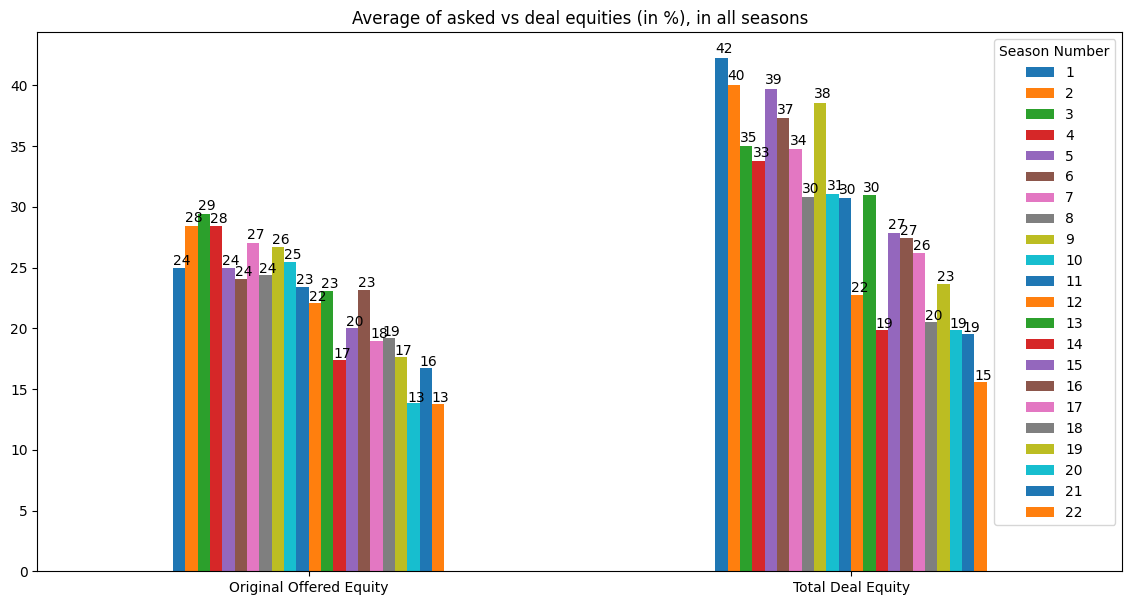

In [22]:
# All seasons average of offered/deal equities
ax = pd.pivot_table(dragons_den, values=['Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(14,7), title="Average of asked vs deal equities (in %), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [23]:
# # Gender wise
# print(dragons_den['Pitchers Gender'].value_counts(),"\n")

# # In percentage
# print(round(dragons_den['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Gender wise percentage")
# dragons_den["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)
# plt.ylabel('')

In [24]:
# # Age wise
# print(dragons_den['Pitchers Average Age'].value_counts(),"\n")

# # In percentage
# print(round(dragons_den['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Age wise percentage")
# dragons_den["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
# plt.ylabel('')

### 💹 35% companies received offers and 65% startups could not convince Dragons to invest

Received Offer
0    953
1    520
Name: count, dtype: Int64 

Received Offer
0    65%
1    35%
Name: proportion, dtype: object


Text(0, 0.5, '')

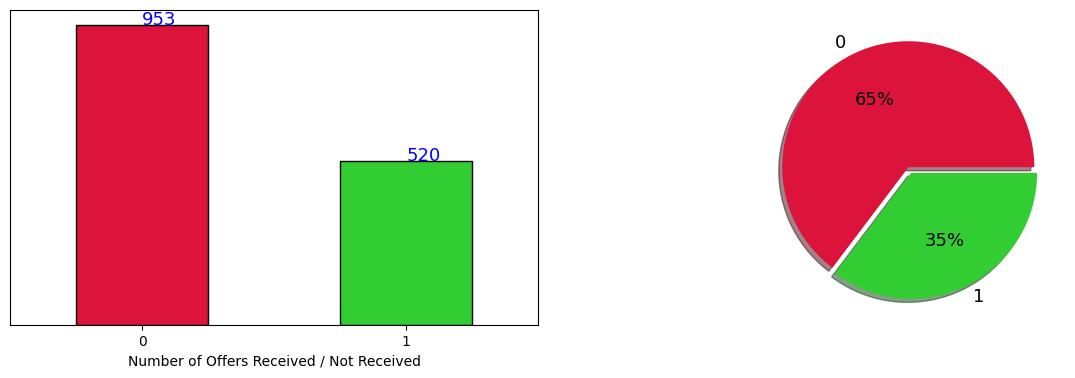

In [25]:
# Offers received
print(dragons_den['Received Offer'].value_counts(), "\n")
print(round(dragons_den['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
dragons_den["Received Offer"].value_counts().plot(kind='bar', color=["crimson","limegreen"], ec="k")
plt.xlabel("Number of Offers Received / Not Received")
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(dragons_den["Received Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")

ax2 = plt.subplot(222)
dragons_den["Received Offer"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["crimson","limegreen"], shadow=True, fontsize=13)
plt.ylabel('')

# 518 companies received offers & 951 startups could not convince #Dragons to invest.

### £ 84% companies accepted offers and 16% startups didn't accept Dragons offer

Accepted Offer
1    439
0     81
Name: count, dtype: Int64 

Accepted Offer
1    84%
0    16%
Name: proportion, dtype: object


Text(0, 0.5, '')

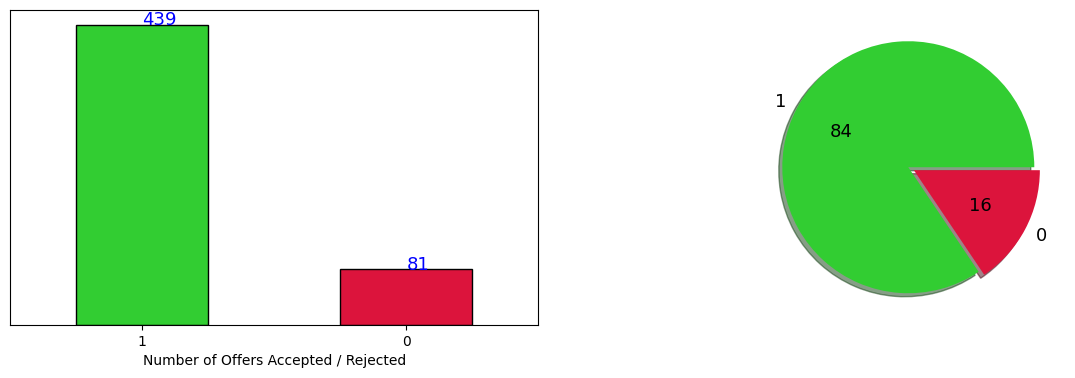

In [26]:
# Offers accepted
print(dragons_den['Accepted Offer'].value_counts(), "\n")
print(round(dragons_den['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15, 9))
ax1 = plt.subplot(221)
dragons_den["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Accepted / Rejected")
plt.yticks([])
plt.xticks(rotation = 0)
for x,y in enumerate(dragons_den["Accepted Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")

ax2 = plt.subplot(222)
dragons_den["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 437 companies accepted investments they got & 81 #Startups did not accept Dragon's offer.

In [27]:
# Offers rejected by pitchers/startup companies
print(dragons_den[dragons_den['Accepted Offer']==0]["Startup Name"].count())
dragons_den.loc[dragons_den['Accepted Offer']==0, ["Season Number","Startup Name","Industry","Original Ask Amount","Original Offered Equity"]]

81


Season Number              Startup Name                 Industry  \
41                1               A-FrameGolf  Fitness/Sports/Outdoors   
65                2                 RakaStaka           Liquor/Alcohol   
75                2                   Orikaso        Food and Beverage   
83                2  AccommodationforStudents            Software/Tech   
99                2            ConcreteCanvas        Business Services   
...             ...                       ...                      ...   
1415             21                  ParkLife             Pet Products   
1422             21                  Ezidrops          Health/Wellness   
1428             21                 WeAreJude          Health/Wellness   
1448             22          CanineDipandDive             Pet Products   
1461             22         TheGilleyUmbrella           Lifestyle/Home   

      Original Ask Amount  Original Offered Equity  
41               125000.0                     26.3  
65               100000.0                     20.0  
75               100000.0                     40.0  
83               150000.0                     50.0  
99                80000.0                     50.0  
...                   ...                      ...  
1415             150000.0                     30.0  
1422              30000.0                     30.0  
1428             100000.0                      3.0  
1448              50000.0                     20.0  
1461              50000.0                     20.0  

[81 rows x 5 columns]

In [28]:
# # Gender wise distribution, who received the offer
# print(dragons_den[dragons_den['Deal Successful']==1]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who received the offer")
# dragons_den[dragons_den['Deal Successful']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"], fontsize=14)
# plt.ylabel('')

In [29]:
# # Gender wise distribution, who could NOT receive the offer
# print(dragons_den[dragons_den['Deal Successful']==0]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who could NOT receive the offer")
# dragons_den[dragons_den['Deal Successful']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
# plt.ylabel('')

In [30]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(dragons_den['Original Ask Amount'].max(), 'GBP', locale='en_UK').replace(".00", ""))

Maximum amount requested, by a pitcher - £2,500,000


In [31]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(dragons_den['Original Ask Amount'].min(), 'GBP', locale='en_UK').replace(".00", ""))

Least amount requested, by a pitcher - £5


In [32]:
# Sum of investment amount asked, in Dragons' Den UK
print("Sum of investment amount asked, by all startup companies, in UK Dragons' Den -", format_currency(dragons_den['Original Ask Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in UK Dragons' Den - £122,397,755


In [33]:
# Amount invested by all Dragons, in UK Dragons' Den
print("Amount invested by all Dragons, in Dragons' Den UK -", format_currency(dragons_den['Total Deal Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))

Amount invested by all Dragons, in Dragons' Den UK - £16,779,005


In [34]:
# Sum of loan/debt amount, in American Dragons' Den
print("Sum of loan/debt amount, given by all Dragons, in American Dragons' Den -", format_currency(dragons_den['Loan'].sum(), 'GBP', locale='en_UK').replace(".00", ""))

Sum of loan/debt amount, given by all Dragons, in American Dragons' Den - £0


In [35]:
# Number of investments with more than 100K amount
print(dragons_den[dragons_den['Total Deal Amount']>=100000]["Startup Name"].count())

49


In [36]:
# Top 15 investments, as per total investment/deal amount
print(dragons_den.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

tmpdf = dragons_den.sort_values('Total Deal Amount', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest investment as per deal amount", text=tmpdf['Total Deal Amount'])
fig.show(renderer="iframe")

Startup Name
Kimaï                         250000.0
GamingAlerts                  200000.0
ProWasteManagementServices    200000.0
TheWandCompany                200000.0
VisualTalentLtd               175000.0
Igloo                         160000.0
TheGeneratingCompany          160000.0
BigClothing4You               150000.0
Cheesegeek                    150000.0
ElectroExpo                   150000.0
ExtendRobotics                150000.0
MixAlbum                      150000.0
MoBros                        150000.0
Rapstrap                      150000.0
SquareMile                    150000.0
Name: Total Deal Amount, dtype: float64


In [37]:
# Top 20 investments, as per total equity/shares percentage diluted
print(dragons_den.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = dragons_den.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name
RKARecords                 79.0
BareNakedFoods             50.0
BeamBlock                  50.0
Blindsinabox               50.0
CaribbeanReadyMeals        50.0
CordinaHair                50.0
FitFurLife                 50.0
Liquiproof                 50.0
Rapstrap                   50.0
TPlus                      50.0
BeachPowderLtd             49.0
LeBeanock                  49.0
Sweet-EscottAviationLtd    49.0
LittleHoppabySophie        45.0
LoveDaPop                  45.0
Nimble                     45.0
ParkingPerx                45.0
PeggyRainLtd               45.0
RemPods                    45.0
SlappieLtd                 45.0
Name: Total Deal Equity, dtype: float64


In [38]:
# Startups who sold (exactly) 1/3rd of their company (equity) to Dragons
print(dragons_den.loc[dragons_den['Total Deal Equity'] == 33.3][["Startup Name"]].count())
print(dragons_den.loc[dragons_den['Total Deal Equity'] == 33.3][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = dragons_den.loc[dragons_den['Total Deal Equity'] == 33.3]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    3
dtype: int64
      Season Number            Startup Name  Total Deal Equity
688              10  ATurner&SonsSausageLtd               33.3
890              13                  Yogiyo               33.3
1109             16             DidsburyGin               33.3


In [39]:
# Startups who sold more than 1/3rd of their company (equity) to Dragons
print(dragons_den.loc[dragons_den['Total Deal Equity'] > 32 ][["Startup Name"]].count())
print(dragons_den.loc[dragons_den['Total Deal Equity'] > 32 ][["Season Number","Startup Name","Total Deal Amount", "Total Deal Equity"]])

tmpdf = dragons_den.loc[dragons_den['Total Deal Equity'] > 32 ].sort_values('Total Deal Equity', ascending=False)
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold more than 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    69
dtype: int64
      Season Number     Startup Name  Total Deal Amount  Total Deal Equity
8                 1         Umbrolly           150000.0               40.0
12                1       GrailsLtd1           120000.0               40.0
27                1        LeBeanock            54000.0               49.0
60                1  VisualTalentLtd           175000.0               40.0
67                2       SquareMile           150000.0               40.0
...             ...              ...                ...                ...
1420             21  ZebedeeAnyAngle            75000.0               40.0
1437             21     YardArtUKLtd            50000.0               35.0
1438             22        BodyXcore           105000.0               37.5
1439             22          Laceeze            50000.0               40.0
1451             22      Kartabottle            50000.0               33.0

[69 rows x 4 columns]


In [40]:
# # Startups who got Debt/loan amount
# print("Number of startups who got debt/loan amount", dragons_den['Loan'].count(),"\n")

# dragons_den.loc[dragons_den['Loan'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Loan"]]

In [41]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", dragons_den['Royalty Deal'].count(),"\n")

dragons_den.loc[dragons_den['Royalty Deal'] == 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 0 



Empty DataFrame
Columns: [Season Number, Startup Name, Total Deal Amount, Total Deal Equity]
Index: []

In [42]:
# Startups who gave Advisory shares
print("Number of startups who gave Advisory shares/equity", dragons_den['Advisory Shares Equity'].count(),"\n")

dragons_den.loc[dragons_den['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

Number of startups who gave Advisory shares/equity 1 



Season Number Startup Name  Total Deal Amount  Total Deal Equity  \
1416             21      Sibstar           125000.0               10.0   

      Advisory Shares Equity  
1416                    10.0

In [43]:
# Deals with conditions
print("Number of startups who accepted conditional deals", dragons_den['Deal Has Conditions'].count(),"\n")

dragons_den.loc[dragons_den['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 43 



Season Number        Startup Name  Total Deal Amount  Total Deal Equity
67                2          SquareMile           150000.0               40.0
667              10        InternAvenue           100000.0               40.0
678              10           WoodBlocX            75000.0               25.0
745              11             RemPods           100000.0               45.0
836              12          ZevenMedia            50000.0               25.0
867              13          Accentuate            45000.0               40.0
874              13            Sync-box            55000.0               35.0
941              14         Iveson&Sage            78000.0               25.0
943              14     TheSnafflingPig            70000.0               20.0
948              14            Cocofina            75000.0               20.0
952              14   KokosoSkinLimited            50000.0               30.0
961              14          ActiveAway            25000.0               20.0
987              14     Watmuff&Beckett            75000.0               20.0
1029             15           B-Tempted            75000.0               40.0
1030             15         ShakeSphere            75000.0               30.0
1063             16               VIVIT            90000.0               20.0
1115             16           OateinLtd            50000.0               25.0
1165             17              Nimble            85000.0               45.0
1194             18             Offblak            70000.0               10.0
1227             18            OwenDrew            50000.0               30.0
1248             18        MiniFirstAid            50000.0               20.0
1253             18             NobuPet            50000.0               35.0
1259             18       PositiveBirth           136000.0               10.0
1260             18  TheWorkbenchLondon            50000.0               45.0
1261             19          Cheesegeek           150000.0                7.5
1268             19         PiddlePatch            50000.0               30.0
1298             19              Toddle            60000.0               13.0
1304             19       Let'sSanitise            80000.0               25.0
1317             19      CaffeineBullet            60000.0               25.0
1352             20     Clear‘n’Collect            50000.0               25.0
1364             20   RedcoteLeisureLtd           100000.0               15.0
1369             20            Botanycl            60000.0               25.0
1382             21        PeggyRainLtd            80000.0               45.0
1394             21         PavanBeauty            50000.0               40.0
1412             21          TastyMates            60000.0               20.0
1420             21     ZebedeeAnyAngle            75000.0               40.0
1437             21        YardArtUKLtd            50000.0               35.0
1439             22             Laceeze            50000.0               40.0
1443             22            Choppity           100000.0               15.0
1444             22   MysteryJerseyKing            50000.0               15.0
1451             22         Kartabottle            50000.0               33.0
1452             22             LoveSum            50000.0               20.0
1462             22     StashedProducts           100000.0                7.0

In [44]:
# # Gender/age wise pitchers combination
# dragons_den.groupby([dragons_den['Pitchers Gender'], dragons_den['Pitchers Average Age'], dragons_den['Multiple Entrepreneurs']]).size().nlargest(10)

## 💰 Which Dragon invested most ?

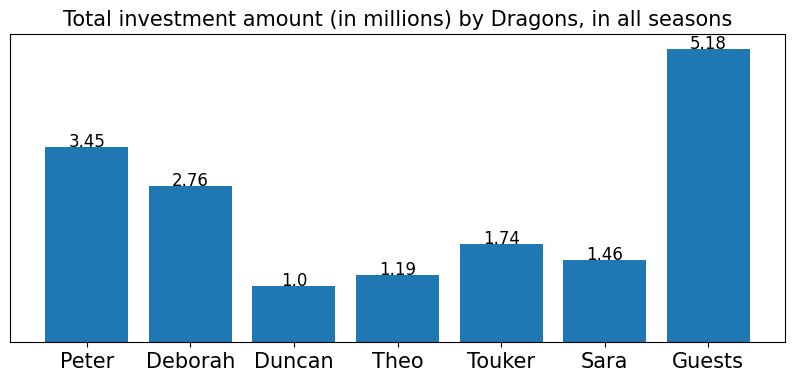

In [45]:
# Amount Invested by Dragons, in all seasons
Amount = [(dragons_den['Peter Jones Investment Amount']/1000000).sum(), (dragons_den['Deborah Meaden Investment Amount']/1000000).sum(), (dragons_den['Duncan Bannatyne Investment Amount']/1000000).sum(), (dragons_den['Theo Paphitis Investment Amount']/1000000).sum(),
    (dragons_den['Touker Suleyman Investment Amount']/1000000).sum(), (dragons_den['Sara Davies Investment Amount']/1000000).sum(), (dragons_den['Guest Investment Amount']/1000000).sum()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Dragons, in all seasons", fontsize=15)
plt.show()

# Peter invested maximum amount, in all seasons - 3.42M pounds (excluding guests)
# Dunca invested minimum amount, in all seasons - 1.00M pounds (excluding guests)

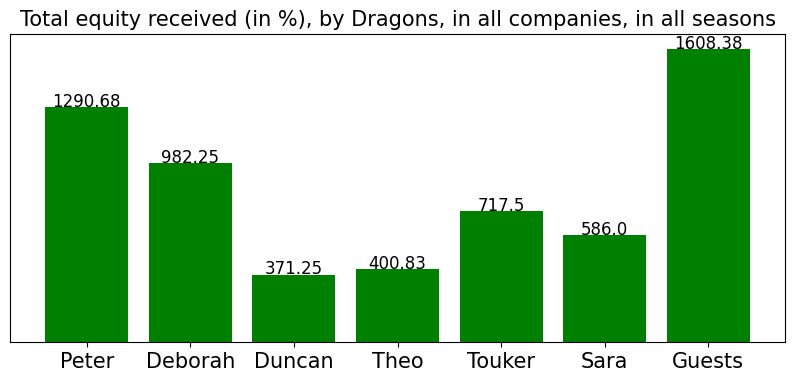

In [46]:
# Equity received by Dragons, in all seasons
Equity = [dragons_den['Peter Jones Investment Equity'].sum(), dragons_den['Deborah Meaden Investment Equity'].sum(), dragons_den['Duncan Bannatyne Investment Equity'].sum(), dragons_den['Theo Paphitis Investment Equity'].sum(),
    dragons_den['Touker Suleyman Investment Equity'].sum(), dragons_den['Sara Davies Investment Equity'].sum(), dragons_den['Guest Investment Equity'].sum()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Dragons, in all companies, in all seasons", fontsize=15)
plt.show()

# Peter got maximum equity of - 1285% in different companies, in all seasons (excluding guests)
# Duncan got minimum equity of - 371% in different companies, in all seasons (excluding guests)

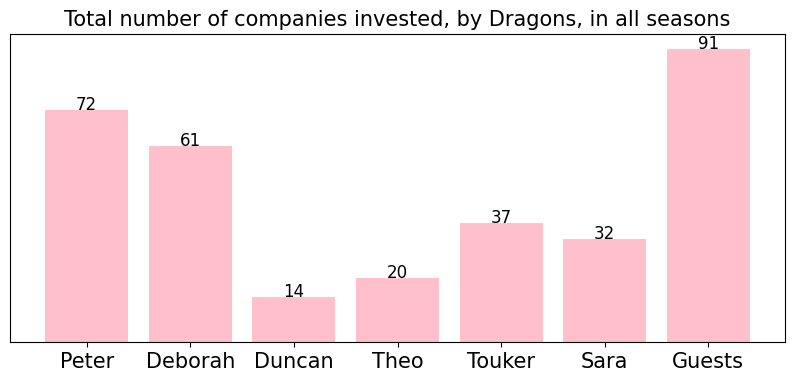

In [47]:
# Number of companies invested, in all seasons
Amount = [(dragons_den['Peter Jones Investment Amount']).count(), (dragons_den['Deborah Meaden Investment Amount']).count(), (dragons_den['Duncan Bannatyne Investment Amount']).count(), (dragons_den['Theo Paphitis Investment Amount']).count(),
    (dragons_den['Touker Suleyman Investment Amount']).count(), (dragons_den['Sara Davies Investment Amount']).count(), (dragons_den['Guest Investment Amount']).count()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested, by Dragons, in all seasons", fontsize=15)
plt.show()

# Peter invested in most number of companies (among regular Dragons)
# Duncan invested in least number of companies (among regular Dragons)

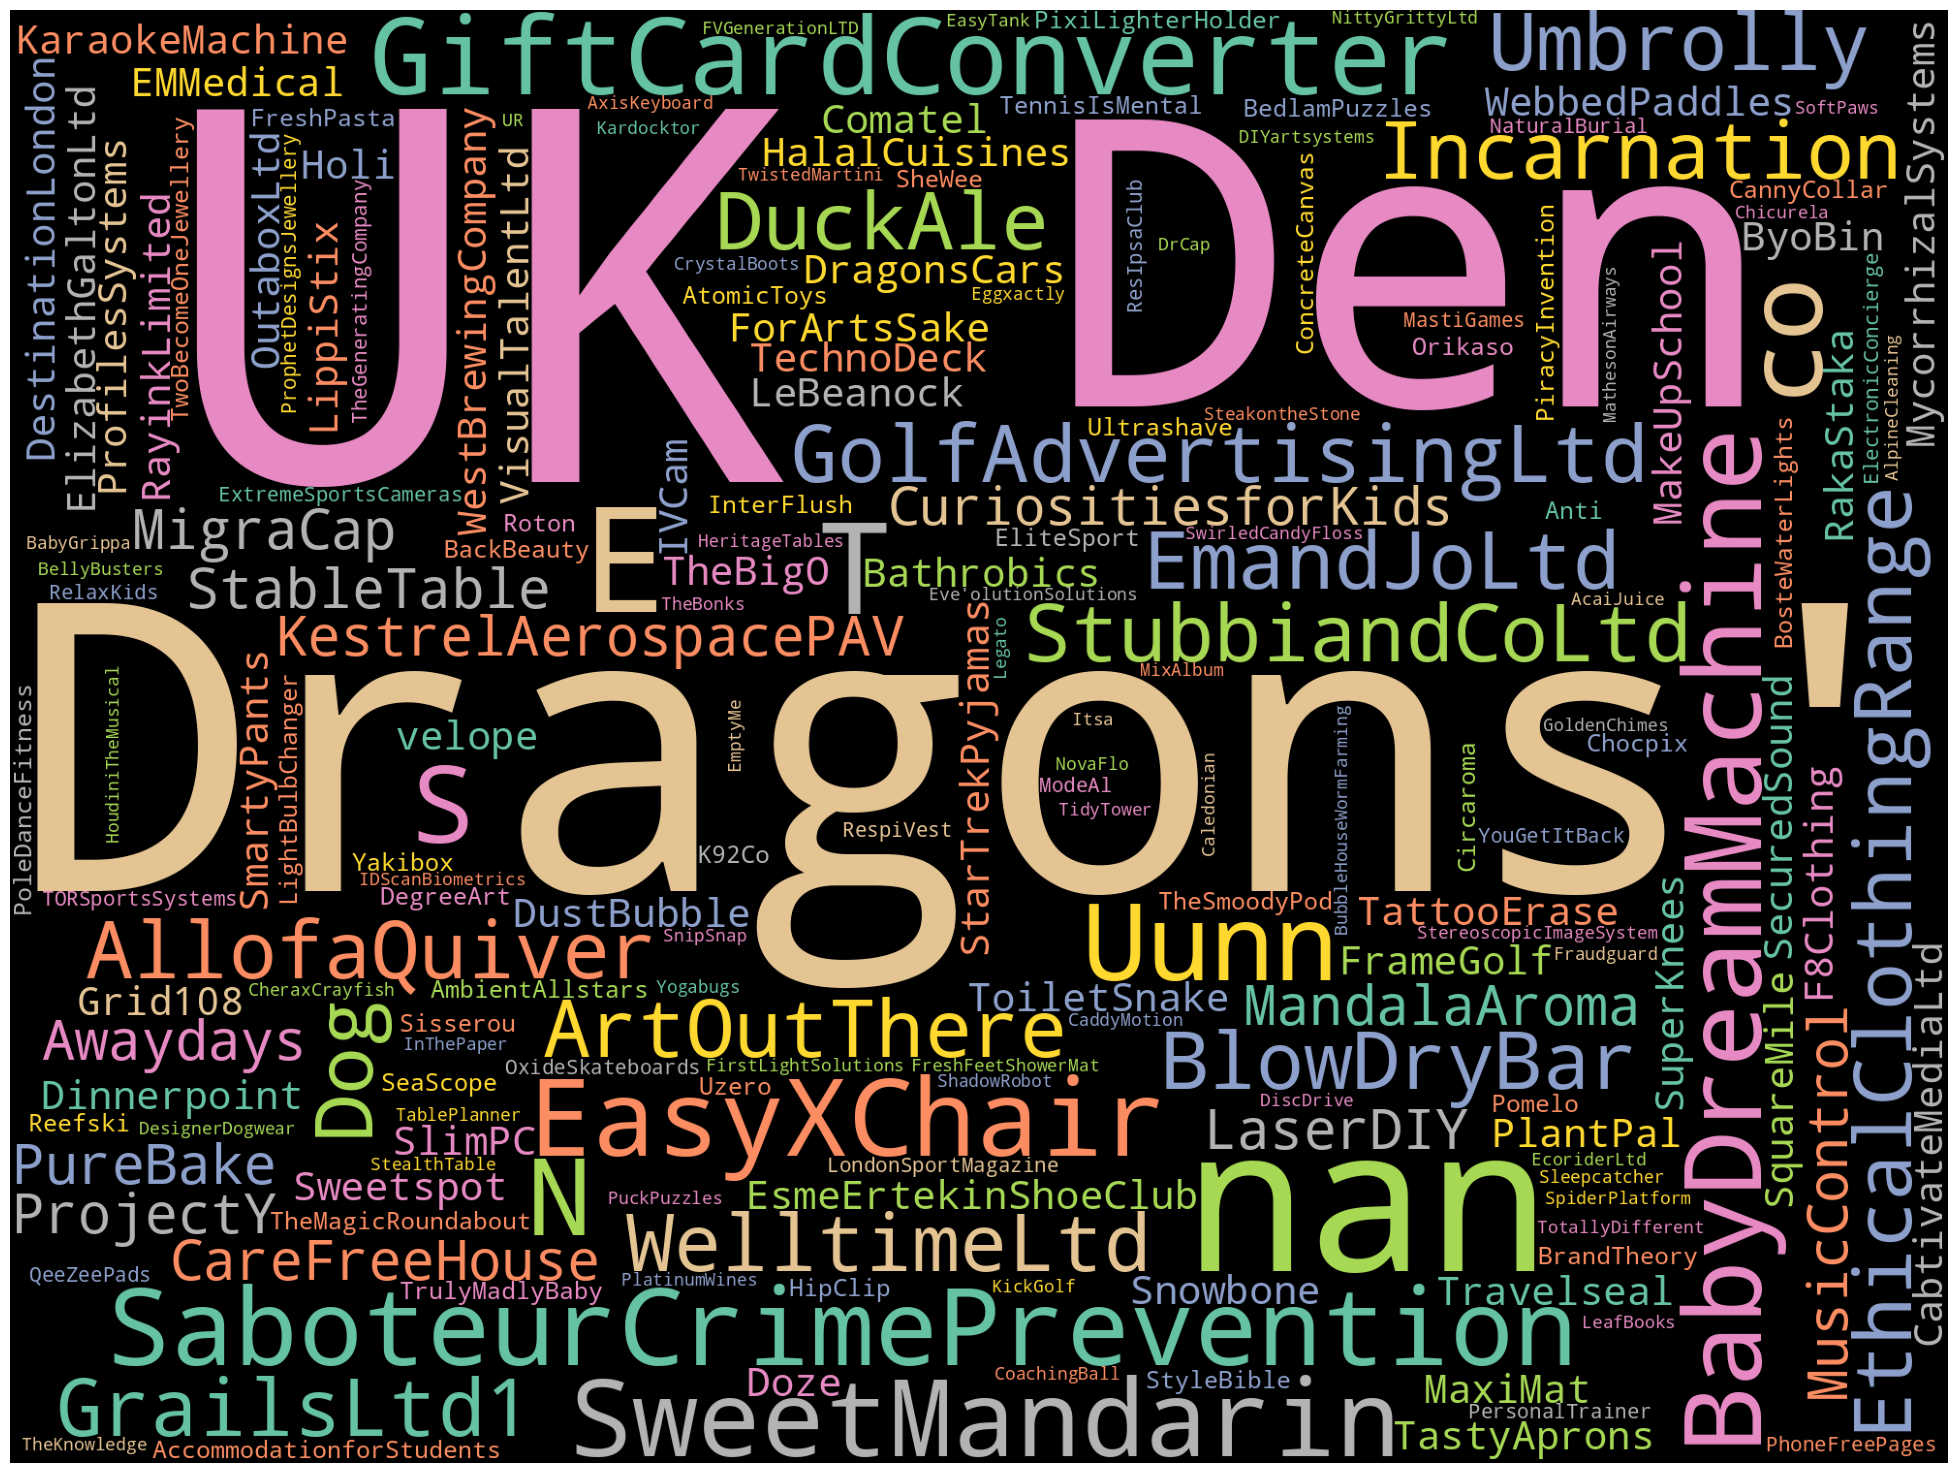

In [48]:
# Word cloud based on Startup Names, in all seasons
text = " Dragons' Den UK ".join(cat for cat in dragons_den['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

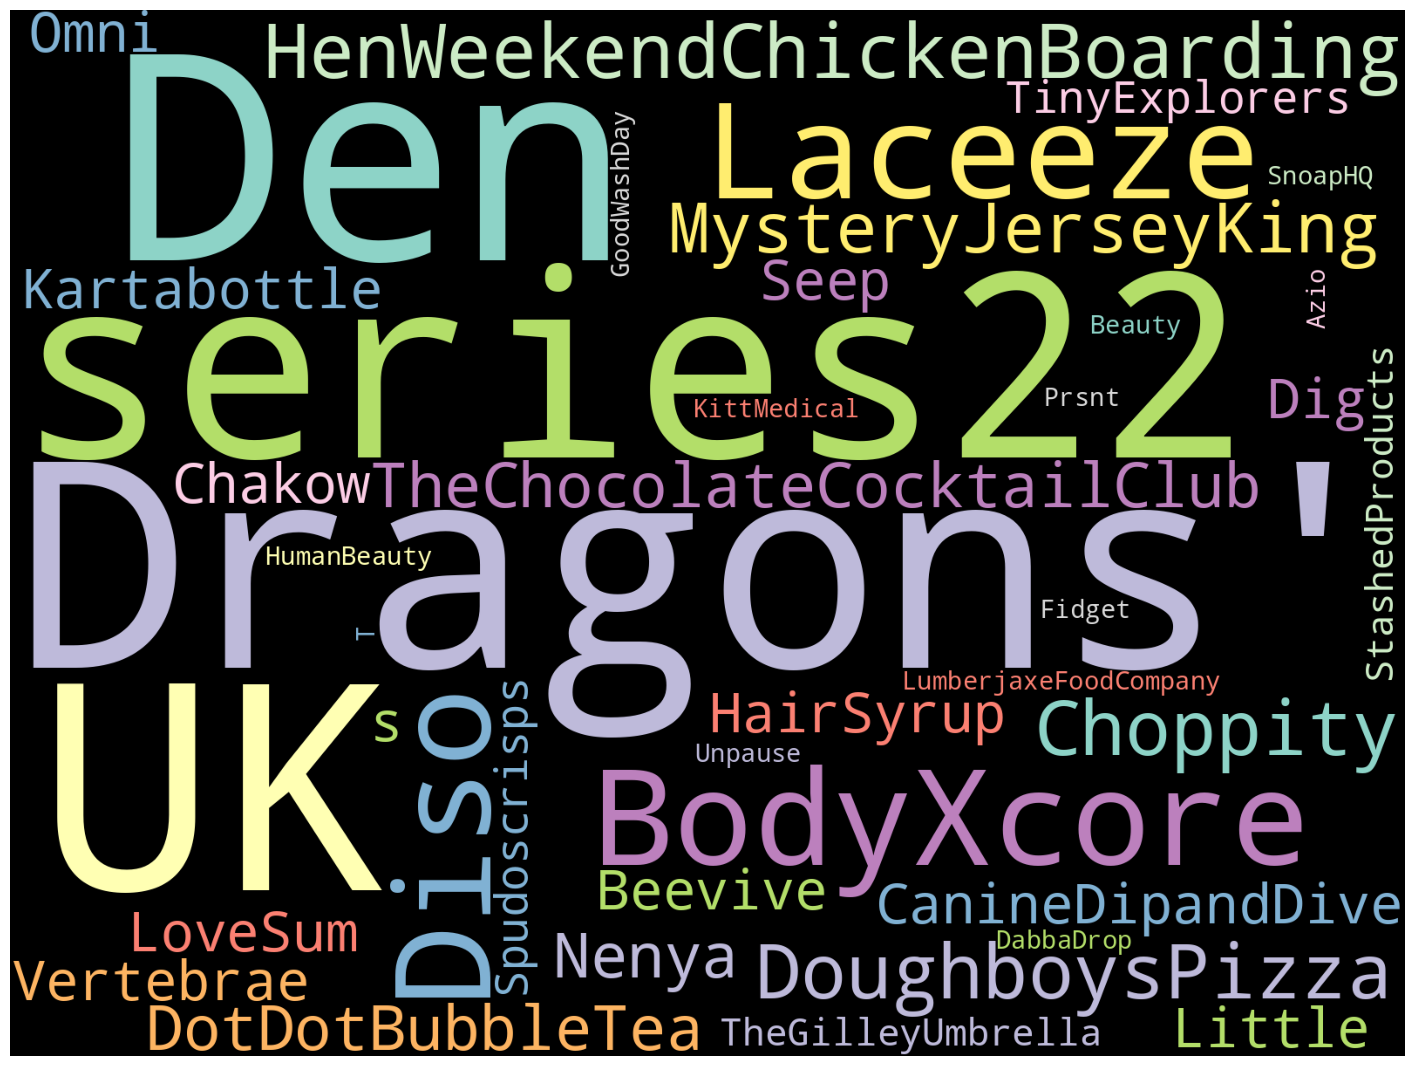

In [49]:
# Word cloud based on Startup Names, in current/latest season (22nd season)
text = " Dragons' Den UK series22 ".join(cat for cat in dragons_den_recent['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(18,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

## 🔥 Peter Jones's Investments

Total investments by Peter Jones  72
Investment amount by Peter Jones £3,453,834.33
Equity received by Peter Jones 1290.68 % in different companies

Company details:
------------------------------------------------------------------------------------------
                 Startup Name                Industry  Peter Jones Investment Amount
                     Umbrolly       Business Services                    75000.00000
              VisualTalentLtd          Fashion/Beauty                   175000.00000
                   SquareMile          Lifestyle/Home                    75000.00000
         TheGeneratingCompany Fitness/Sports/Outdoors                    80000.00000
            ReggaeReggaeSauce       Food and Beverage                    25000.00000
                       iTeddy       Business Services                    70000.00000
                 ScentsofTime          Fashion/Beauty                    40000.00000
            ConcentrateDesign      Children/Education          

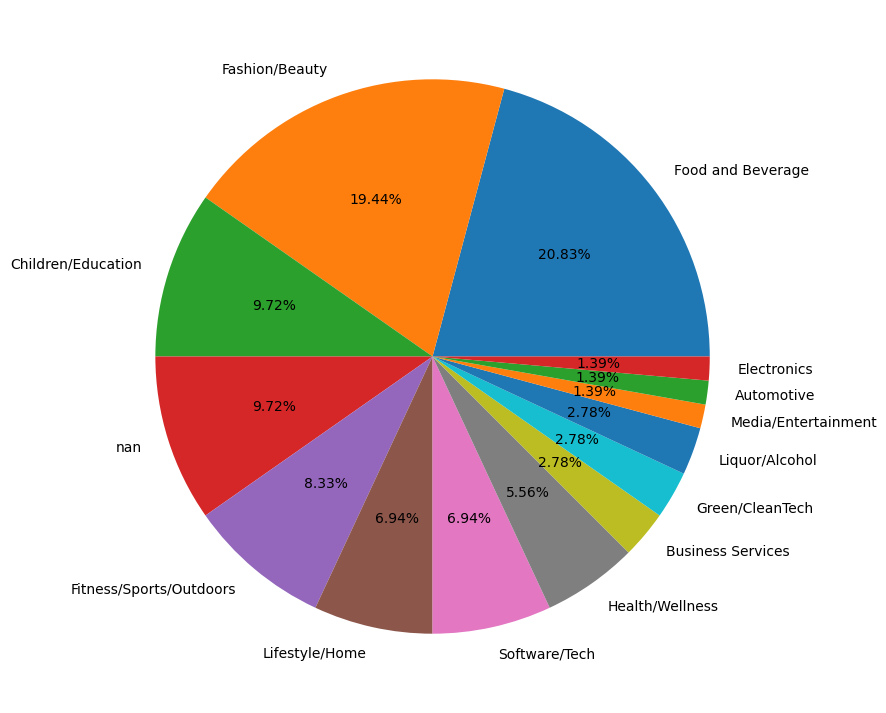

In [50]:
print("Total investments by Peter Jones", dragons_den[dragons_den['Peter Jones Investment Amount']>0][['Peter Jones Investment Amount']].count().to_string()[-3:])
print("Investment amount by Peter Jones", format_currency(dragons_den['Peter Jones Investment Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))
print("Equity received by Peter Jones", round(dragons_den['Peter Jones Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Peter Jones Investment Amount']>0][["Startup Name","Industry","Peter Jones Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nPeter Jones industry wise investments\n")
print(dragons_den[dragons_den['Peter Jones Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Peter Jones Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Peter Jones Investment Amount']>0] [["Startup Name","Peter Jones Investment Amount","Peter Jones Investment Equity"]].sort_values(by="Peter Jones Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Peter Jones Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎇 Deborah Meaden's Investments

Total investments by Deborah Meaden  61
Investment amount by Deborah Meaden £2,762,167.67
Equity received by Deborah Meaden 982.25 % in different companies

Company details:
------------------------------------------------------------------------------------------
              Startup Name                Industry  Deborah Meaden Investment Amount
                  MixAlbum           Software/Tech                       75000.00000
                youdoodoll      Children/Education                       35000.00000
                  Reestore         Green/CleanTech                       25000.00000
                SteriSpray          Fashion/Beauty                       72500.00000
           JPMEcoLogistics              Automotive                       50000.00000
                 BuggyBoot       Business Services                       80000.00000
           MagicWhiteboard      Children/Education                       50000.00000
ProWasteManagementServices         Green/CleanTech     

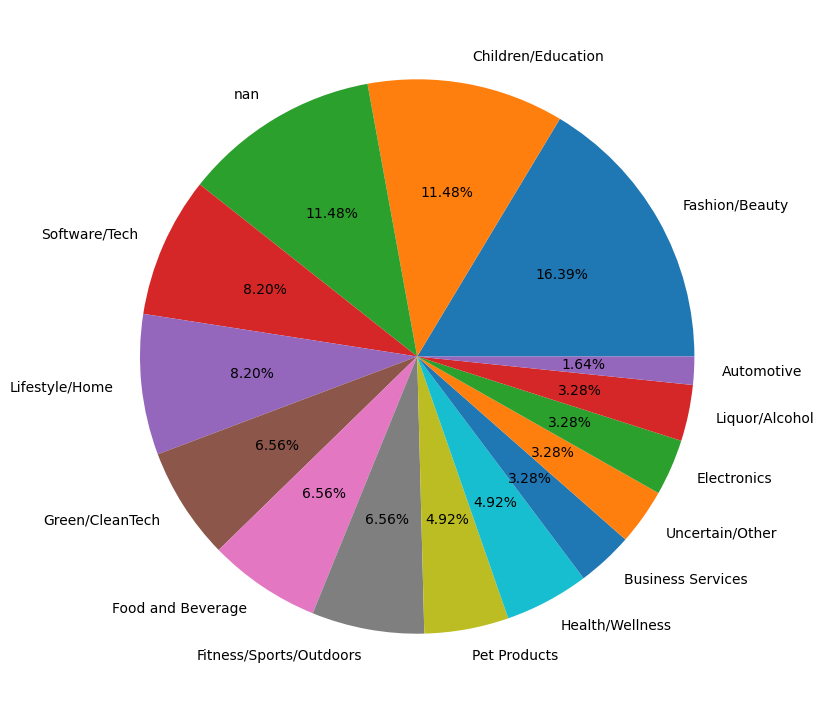

In [51]:
print("Total investments by Deborah Meaden", dragons_den[dragons_den['Deborah Meaden Investment Amount']>0][['Deborah Meaden Investment Amount']].count().to_string()[-3:])
print("Investment amount by Deborah Meaden", format_currency(dragons_den['Deborah Meaden Investment Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))
print("Equity received by Deborah Meaden", round(dragons_den['Deborah Meaden Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Deborah Meaden Investment Amount']>0][["Startup Name","Industry","Deborah Meaden Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDeborah Meaden industry wise investments\n")
print(dragons_den[dragons_den['Deborah Meaden Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Deborah Meaden Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Deborah Meaden Investment Amount']>0] [["Startup Name","Deborah Meaden Investment Amount","Deborah Meaden Investment Equity"]].sort_values(by="Deborah Meaden Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Deborah Meaden Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## ✳️ Duncan Bannatyne's Investments

Total investments by Duncan Bannatyne  14
Investment amount by Duncan Bannatyne £995,000
Equity received by Duncan Bannatyne 371.25 % in different companies

Company details:
------------------------------------------------------------------------------------------
              Startup Name           Industry  Duncan Bannatyne Investment Amount
                  Umbrolly  Business Services                             75000.0
                     Igloo  Business Services                             80000.0
  RazzamatazTheatreSchools Children/Education                             50000.0
       CaribbeanReadyMeals  Food and Beverage                             50000.0
               ElectroExpo        Electronics                             75000.0
                    D4MLtd  Business Services                             37500.0
                  Rapstrap    Green/CleanTech                             75000.0
              Blindsinabox     Lifestyle/Home                             2000

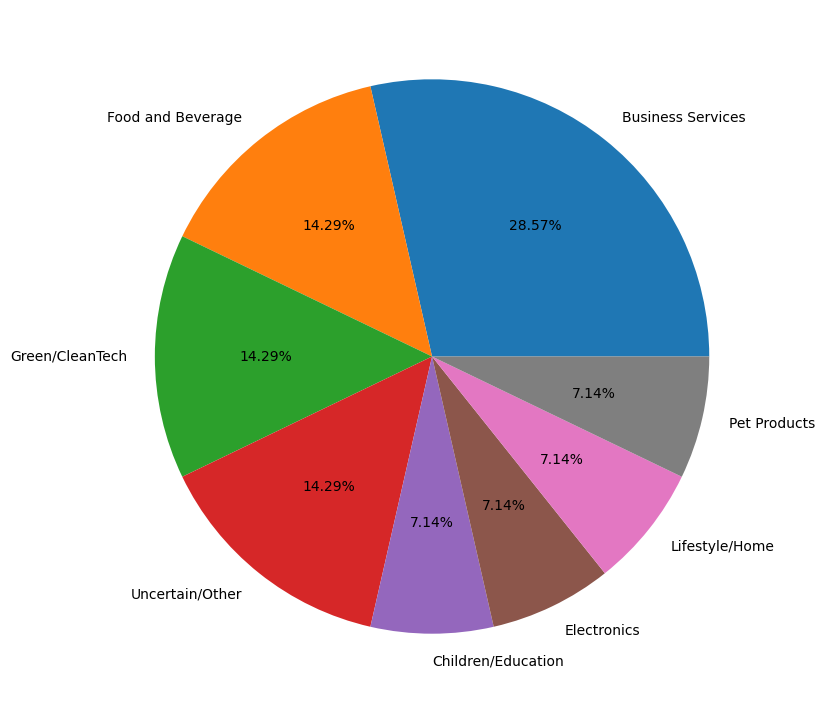

In [52]:
print("Total investments by Duncan Bannatyne", dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0][['Duncan Bannatyne Investment Amount']].count().to_string()[-3:])
print("Investment amount by Duncan Bannatyne", format_currency(dragons_den['Duncan Bannatyne Investment Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))
print("Equity received by Duncan Bannatyne", round(dragons_den['Duncan Bannatyne Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Duncan Bannatyne Investment Amount']>0][["Startup Name","Industry","Duncan Bannatyne Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDuncan Bannatyne industry wise investments\n")
print(dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Duncan Bannatyne Investment Amount']>0] [["Startup Name","Duncan Bannatyne Investment Amount","Duncan Bannatyne Investment Equity"]].sort_values(by="Duncan Bannatyne Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Duncan Bannatyne Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🚀 Theo Paphitis's Investments

Total investments by Theo Paphitis  20
Investment amount by Theo Paphitis £1,191,666.67
Equity received by Theo Paphitis 400.83 % in different companies

Company details:
------------------------------------------------------------------------------------------
              Startup Name                Industry  Theo Paphitis Investment Amount
                SquareMile          Lifestyle/Home                      75000.00000
      TheGeneratingCompany Fitness/Sports/Outdoors                      80000.00000
                  MixAlbum           Software/Tech                      75000.00000
                    iTeddy       Business Services                      70000.00000
                    Foldio          Lifestyle/Home                      80000.00000
              ScentsofTime          Fashion/Beauty                      40000.00000
              GamingAlerts           Software/Tech                     200000.00000
                  Reestore         Green/CleanTech                

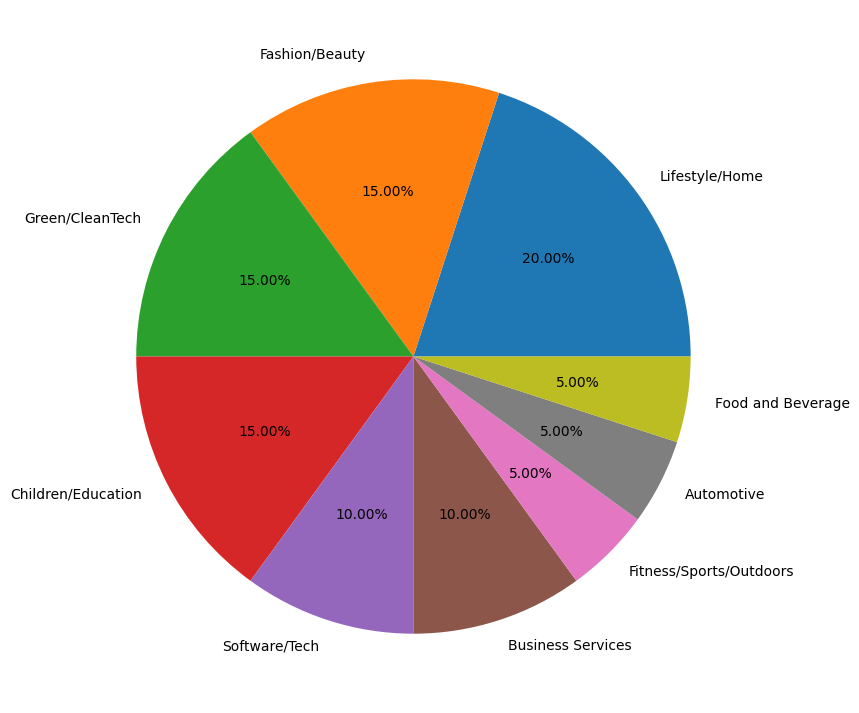

In [53]:
print("Total investments by Theo Paphitis", dragons_den[dragons_den['Theo Paphitis Investment Amount']>0][['Theo Paphitis Investment Amount']].count().to_string()[-3:])
print("Investment amount by Theo Paphitis", format_currency(dragons_den['Theo Paphitis Investment Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))
print("Equity received by Theo Paphitis", round(dragons_den['Theo Paphitis Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Theo Paphitis Investment Amount']>0][["Startup Name","Industry","Theo Paphitis Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nTheo Paphitis industry wise investments\n")
print(dragons_den[dragons_den['Theo Paphitis Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Theo Paphitis Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Theo Paphitis Investment Amount']>0] [["Startup Name","Theo Paphitis Investment Amount","Theo Paphitis Investment Equity"]].sort_values(by="Theo Paphitis Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Theo Paphitis Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎾  Touker Suleyman's Investments

Total investments by Touker Suleyman  37
Investment amount by Touker Suleyman £1,740,334.33
Equity received by Touker Suleyman 717.5 % in different companies

Company details:
------------------------------------------------------------------------------------------
            Startup Name                Industry  Touker Suleyman Investment Amount
               BeamBlock Fitness/Sports/Outdoors                        25000.00000
           TimberkitsLtd      Children/Education                        40000.00000
              Liquiproof          Fashion/Beauty                       100000.00000
              BadBrownie       Food and Beverage                        60000.00000
               BootBuddy          Fashion/Beauty                        20000.00000
       KokosoSkinLimited          Fashion/Beauty                        50000.00000
   TheWoolCoutureCompany       Business Services                        25000.00000
           Nana'sManners      Children/Education             

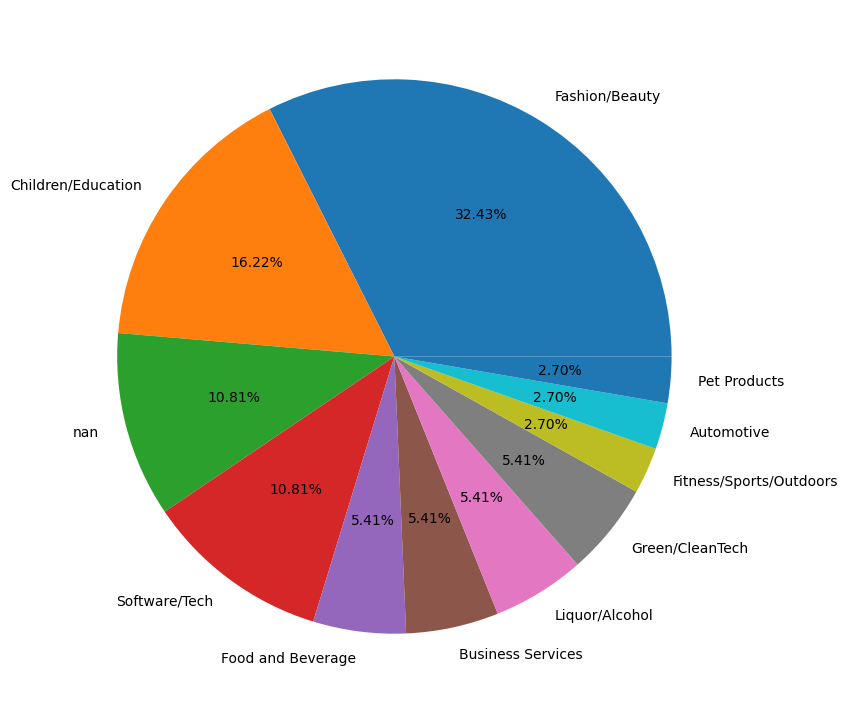

In [54]:
print("Total investments by Touker Suleyman", dragons_den[dragons_den['Touker Suleyman Investment Amount']>0][['Touker Suleyman Investment Amount']].count().to_string()[-3:])
print("Investment amount by Touker Suleyman", format_currency(dragons_den['Touker Suleyman Investment Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))
print("Equity received by Touker Suleyman", round(dragons_den['Touker Suleyman Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Touker Suleyman Investment Amount']>0][["Startup Name","Industry","Touker Suleyman Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nTouker Suleyman industry wise investments\n")
print(dragons_den[dragons_den['Touker Suleyman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Touker Suleyman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Touker Suleyman Investment Amount']>0] [["Startup Name","Touker Suleyman Investment Amount","Touker Suleyman Investment Equity"]].sort_values(by="Touker Suleyman Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Touker Suleyman Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## ⭐ Sara Davies's Investments

Total investments by Sara Davies  32
Investment amount by Sara Davies £1,456,667.67
Equity received by Sara Davies 586.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
      Startup Name                Industry  Sara Davies Investment Amount
          Tancream          Fashion/Beauty                    37500.00000
            MakTok       Food and Beverage                    60000.00000
          PipeEasy                     nan                    41000.00000
   DrynksUnlimited       Food and Beverage                   125000.00000
            Nimble                     nan                    28333.33333
           Fliptop                     nan                    10000.00000
        PeachyLean                     nan                    33333.33333
   TrappedintheWeb           Software/Tech                    30000.00000
    BeachPowderLtd          Fashion/Beauty                    30000.00000
     

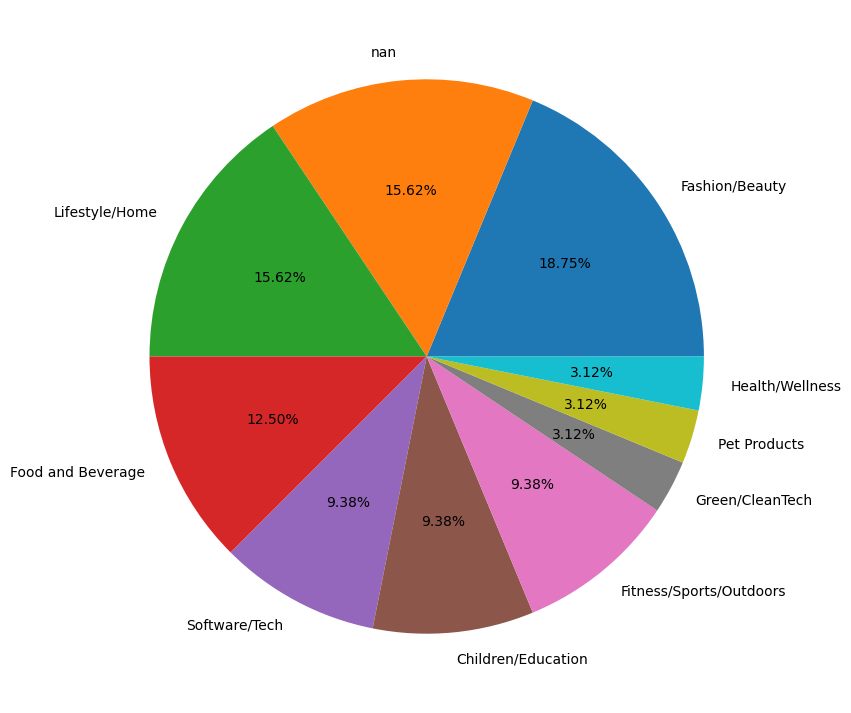

In [55]:
print("Total investments by Sara Davies", dragons_den[dragons_den['Sara Davies Investment Amount']>0][['Sara Davies Investment Amount']].count().to_string()[-3:])
print("Investment amount by Sara Davies", format_currency(dragons_den['Sara Davies Investment Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))
print("Equity received by Sara Davies", round(dragons_den['Sara Davies Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Sara Davies Investment Amount']>0][["Startup Name","Industry","Sara Davies Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nSara Davies industry wise investments\n")
print(dragons_den[dragons_den['Sara Davies Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Sara Davies Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Sara Davies Investment Amount']>0] [["Startup Name","Sara Davies Investment Amount","Sara Davies Investment Equity"]].sort_values(by="Sara Davies Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Sara Davies Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎆 All Guest's Investments
#### (Dragon who presented in fewer seasons)

Total investments by all Guests  91
Investment amount by all Guests £5,179,334.33
Equity received by all Guests 1608.38 % in different companies

Company details:
--------------------------------------------------------------------------------------------
                 Startup Name                Industry  Guest Investment Amount         Invested Guest Name
                   GrailsLtd1          Fashion/Beauty             120000.00000   DougRichard,RachelElnaugh
                    LeBeanock          Lifestyle/Home              54000.00000               RachelElnaugh
          FirstLightSolutions       Business Services             100000.00000             RichardFarleigh
                        Igloo       Business Services              80000.00000             RichardFarleigh
            ReggaeReggaeSauce       Food and Beverage              25000.00000             RichardFarleigh
                    Goldgenie          Lifestyle/Home              60000.00000                   James

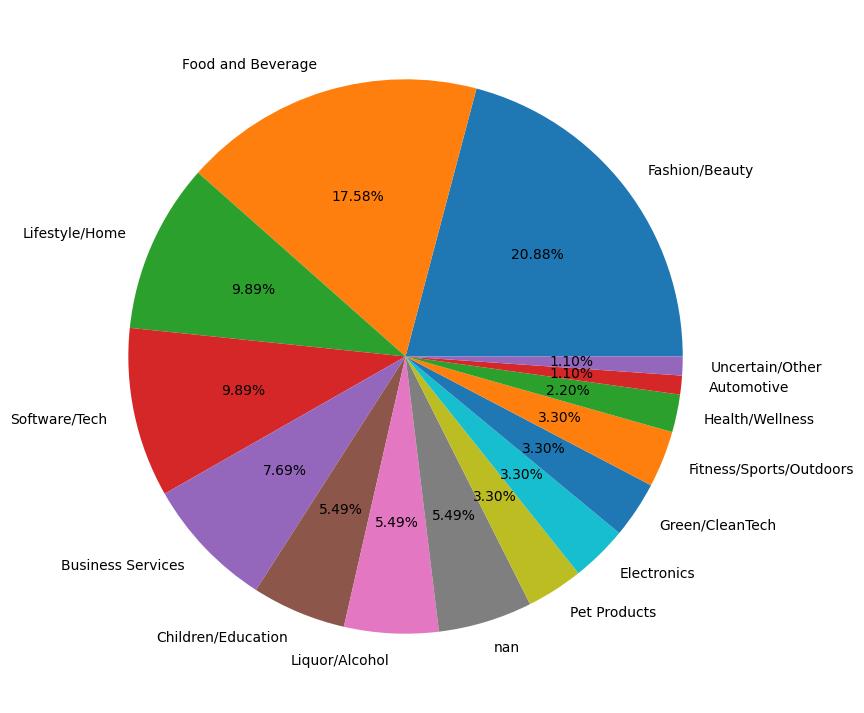

In [56]:
print("Total investments by all Guests", dragons_den[dragons_den['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-3:])
print("Investment amount by all Guests", format_currency(dragons_den['Guest Investment Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))
print("Equity received by all Guests", round(dragons_den['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(dragons_den.loc[dragons_den['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Invested Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(dragons_den[dragons_den['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

In [57]:
# Guest dragons and number of companies they invested
dragons_den.loc[dragons_den['Guest Investment Amount'] > 1]['Invested Guest Name'].str.split(',').explode('Invested Guest Name').value_counts().sort_values(ascending=False)

Invested Guest Name
TejLalvani         20
StevenBartlett     19
JamesCaan          11
NickJenkins         9
JennyCampbell       7
Steven Bartlett     6
KellyHoppen         5
PiersLinney         4
SarahWillingham     4
RichardFarleigh     3
HilaryDevey         2
RachelElnaugh       2
Trinny Woodall      1
DougRichard         1
Joe Wicks           1
EmmaGrede           1
Emma Grede          1
Name: count, dtype: int64

In [58]:
# Investment amount by guests, in GBP
tmpdf = dragons_den.loc[dragons_den['Guest Investment Amount'] > 0][['Invested Guest Name','Guest Investment Amount']]
tmpdf['Number of Guests'] = tmpdf['Invested Guest Name'].str.count(',') + 1
tmpdf['Invetested Amount per Guest'] = tmpdf['Guest Investment Amount'] / tmpdf['Number of Guests']
tmpdf = tmpdf.set_index(tmpdf.columns.drop('Invested Guest Name',1).tolist())['Invested Guest Name'].str.split(',', expand=True).stack().reset_index().rename(columns={0:'Invested Guest Name'}).loc[:, tmpdf.columns]
round(tmpdf.groupby(["Invested Guest Name"])["Invetested Amount per Guest"].sum().sort_values(ascending=False))

Invested Guest Name
StevenBartlett     1134001.0
TejLalvani          899667.0
JamesCaan           724167.0
NickJenkins         467500.0
JennyCampbell       365000.0
PiersLinney         280000.0
Steven Bartlett     270000.0
RichardFarleigh     205000.0
SarahWillingham     177500.0
KellyHoppen         155000.0
HilaryDevey         117500.0
RachelElnaugh       114000.0
Emma Grede           90000.0
DougRichard          60000.0
EmmaGrede            60000.0
Joe Wicks            35000.0
Trinny Woodall       25000.0
Name: Invetested Amount per Guest, dtype: float64

Number of Dragons in Deal
1.0    136
2.0     80
3.0      9
5.0      2
Name: count, dtype: int64 

Number of Dragons in Deal
1.0    60%
2.0    35%
3.0     4%
5.0     1%
Name: proportion, dtype: object


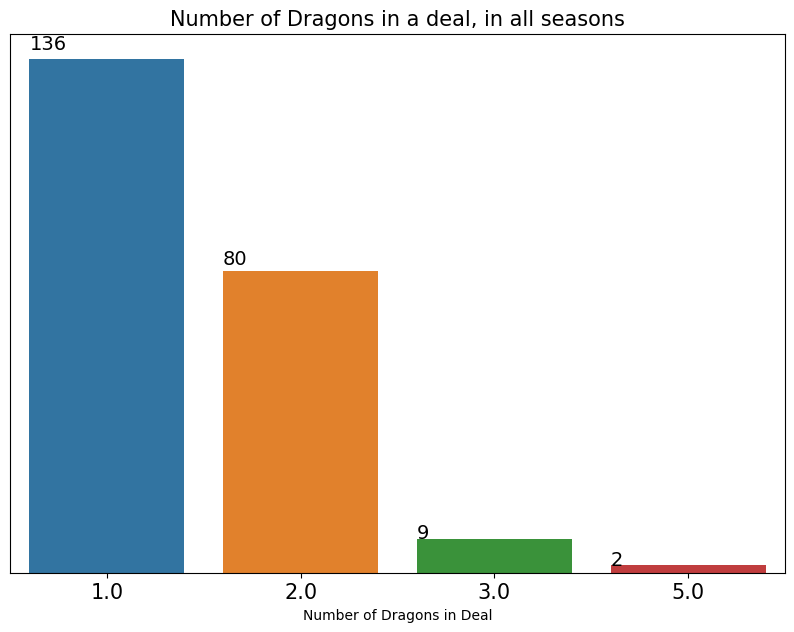

In [59]:
# Number of Dragons in a deal, in all seasons
print(dragons_den['Number of Dragons in Deal'].value_counts(), "\n")

# In percentage
print(round(dragons_den['Number of Dragons in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of Dragons in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = dragons_den, x = 'Number of Dragons in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [60]:
# All Dragons deals
print(dragons_den.loc[dragons_den['Number of Dragons in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

      Season Number Startup Name  Total Deal Amount  Total Deal Equity
1380             20    MoodBears            20000.0               25.0
1399             21  SopperBooks                5.0                5.0


In [61]:
# Dragons with most number of solo deals
amt_cols = dragons_den.columns[dragons_den.columns.str.contains(' Investment Amount')].tolist()
tmp = dragons_den.loc[dragons_den['Number of Dragons in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(5)

# PeterJones did most number of solo deals, than any other Dragon

Guest Investment Amount              42
Peter Jones Investment Amount        26
Deborah Meaden Investment Amount     23
Sara Davies Investment Amount        20
Touker Suleyman Investment Amount    16
dtype: int64

In [62]:
# Dragons with most number of episode presence, in all seasons
present_cols = dragons_den.columns[dragons_den.columns.str.endswith(' Present')].tolist()
tmp = dragons_den[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(5)

# Peter Jones was there in most number of episodes

Peter Jones Present         1461.0
Deborah Meaden Present      1336.0
Duncan Bannatyne Present     863.0
Theo Paphitis Present        670.0
Touker Suleyman Present      590.0
dtype: float64

In [63]:
# # Top 10 UK states of pitcher's
# tmp = dragons_den['Pitchers State'].value_counts().nlargest(10).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 10 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show(renderer="iframe")

In [64]:
# # Top 10 UK cities
# tmp = dragons_den['Pitchers City'].value_counts().nlargest(10).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 10 British cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show(renderer="iframe")

In [65]:
# Channel/network name and number of series, they hosted
pd.pivot_table(dragons_den, values='Season Number', columns='Channel Name', aggfunc=lambda x: len(x.unique()))

Channel Name   BBC One  BBC Two
Season Number        5       17

In [66]:
# Channel/network name and number of pitches, they hosted
dragons_den.groupby('Channel Name').size()

Channel Name
BBC One     282
BBC Two    1191
dtype: int64

In [67]:
# Most frequently asked amount, by startups
dragons_den.groupby('Original Ask Amount').size().nlargest(10)

# 50K is most frequently asked amount

# Original Ask Amount (GBP) and Number times asked

Original Ask Amount
50000.0     288
100000.0    191
75000.0     143
80000.0      96
150000.0     89
60000.0      83
70000.0      53
200000.0     41
40000.0      38
250000.0     30
dtype: int64

In [68]:
# Most frequently offered equity, by startups
dragons_den.groupby('Original Offered Equity').size().nlargest(10)

# 10% to 20% are most frequently offered equities

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
10.0    184
20.0    166
15.0    116
25.0    104
30.0    100
40.0     76
5.0      57
35.0     39
50.0     35
45.0     21
dtype: int64

In [69]:
# ✅ Most frequently invested amount, by Dragons
dragons_den.groupby('Total Deal Amount').size().nlargest(10)

# Dragons mostly invested 50K per deal

# Total Deal Amount (GBP) and Number times invested

Total Deal Amount
50000.0     71
75000.0     26
80000.0     23
60000.0     21
100000.0    21
150000.0     9
70000.0      6
40000.0      4
90000.0      4
120000.0     4
dtype: int64

In [70]:
# ✅ Most frequently received total equity, by Dragons
dragons_den.groupby('Total Deal Equity').size().nlargest(10)

# Dragons are expecting more than 25% equity, in a deal

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
25.0    35
30.0    35
40.0    29
20.0    26
10.0    22
15.0    13
35.0    11
45.0     9
50.0     9
5.0      7
dtype: int64

In [71]:
# Most frequently asked amount (in GBP), deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(dragons_den['Original Ask Amount'], dragons_den['Deal Successful']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
50000.0              58.0                42.0
75000.0              50.0                50.0
80000.0              59.0                41.0
100000.0             35.0                65.0
60000.0              61.0                39.0
150000.0             60.0                40.0
70000.0              44.0                56.0
90000.0              50.0                50.0
20000.0              75.0                25.0
125000.0             50.0                50.0

In [72]:
# Frequently asked amount (in GBP), deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(dragons_den['Original Ask Amount'], dragons_den['Deal Successful']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
72000.0               0.0               100.0
110000.0              0.0               100.0
37500.0               0.0               100.0
95000.0               0.0               100.0
225000.0              0.0               100.0
66000.0               0.0               100.0
175000.0            100.0                 0.0
145000.0            100.0                 0.0
140000.0            100.0                 0.0
136000.0            100.0                 0.0

In [73]:
# Most frequently asked equity, deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(dragons_den['Original Offered Equity'], dragons_den['Deal Successful']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
30.0             53.0                47.0
25.0             52.0                48.0
40.0             44.0                56.0
10.0             68.0                32.0
20.0             56.0                44.0
15.0             60.0                40.0
35.0             41.0                59.0
45.0             60.0                40.0
50.0             45.0                55.0
5.0              62.0                38.0

In [74]:
# Fequently asked equity, deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(dragons_den['Original Offered Equity'], dragons_den['Deal Successful']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
100.0              0.0               100.0
48.0               0.0               100.0
44.0               0.0               100.0
39.0               0.0               100.0
24.0               0.0               100.0
23.0               0.0               100.0
9.0                0.0               100.0
12.0               0.0               100.0
22.0               0.0               100.0
18.0               0.0               100.0

In [75]:
# Mostly successful combinations (of asked amount and offered equity)
dragons_den.loc[dragons_den['Received Offer'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in UK Dragons' Den, ask for 50K-100K with 20-40% equity ✅

Original Ask Amount  Original Offered Equity
50000.0              30.0                       24
                     20.0                       19
                     25.0                       19
                     40.0                       15
                     10.0                       14
100000.0             40.0                       14
                     30.0                       11
75000.0              25.0                        9
100000.0             50.0                        9
75000.0              20.0                        8
dtype: int64

In [76]:
# Most frequently asked amount, by startups who could NOT get a deal
dragons_den.loc[dragons_den['Received Offer'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (GBP) and Number of times asked (but rejected by Dragons) ❌

Original Ask Amount
50000.0     150
100000.0    117
75000.0      83
150000.0     66
80000.0      55
60000.0      47
70000.0      33
200000.0     28
40000.0      24
250000.0     22
dtype: int64

In [77]:
# Most frequently offered equity, by startups who could NOT get a deal
dragons_den.loc[dragons_den['Received Offer'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number of times offered (but rejected by Dragons) ❌

Original Offered Equity
10.0    139
20.0    113
15.0     92
5.0      41
25.0     37
30.0     24
7.5       8
7.0       7
40.0      7
35.0      6
dtype: int64

In [78]:
# Mostly rejected combinations (of asked amount and offered equity)
dragons_den.loc[dragons_den['Received Offer'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Dragons' Den UK, don't ask for 50K-100K with 10-20% equity 🔴

Original Ask Amount  Original Offered Equity
50000.0              10.0                       32
100000.0             10.0                       24
50000.0              20.0                       22
100000.0             20.0                       19
75000.0              15.0                       17
50000.0              15.0                       14
150000.0             15.0                       13
75000.0              20.0                       12
40000.0              20.0                       11
60000.0              20.0                       11
dtype: int64

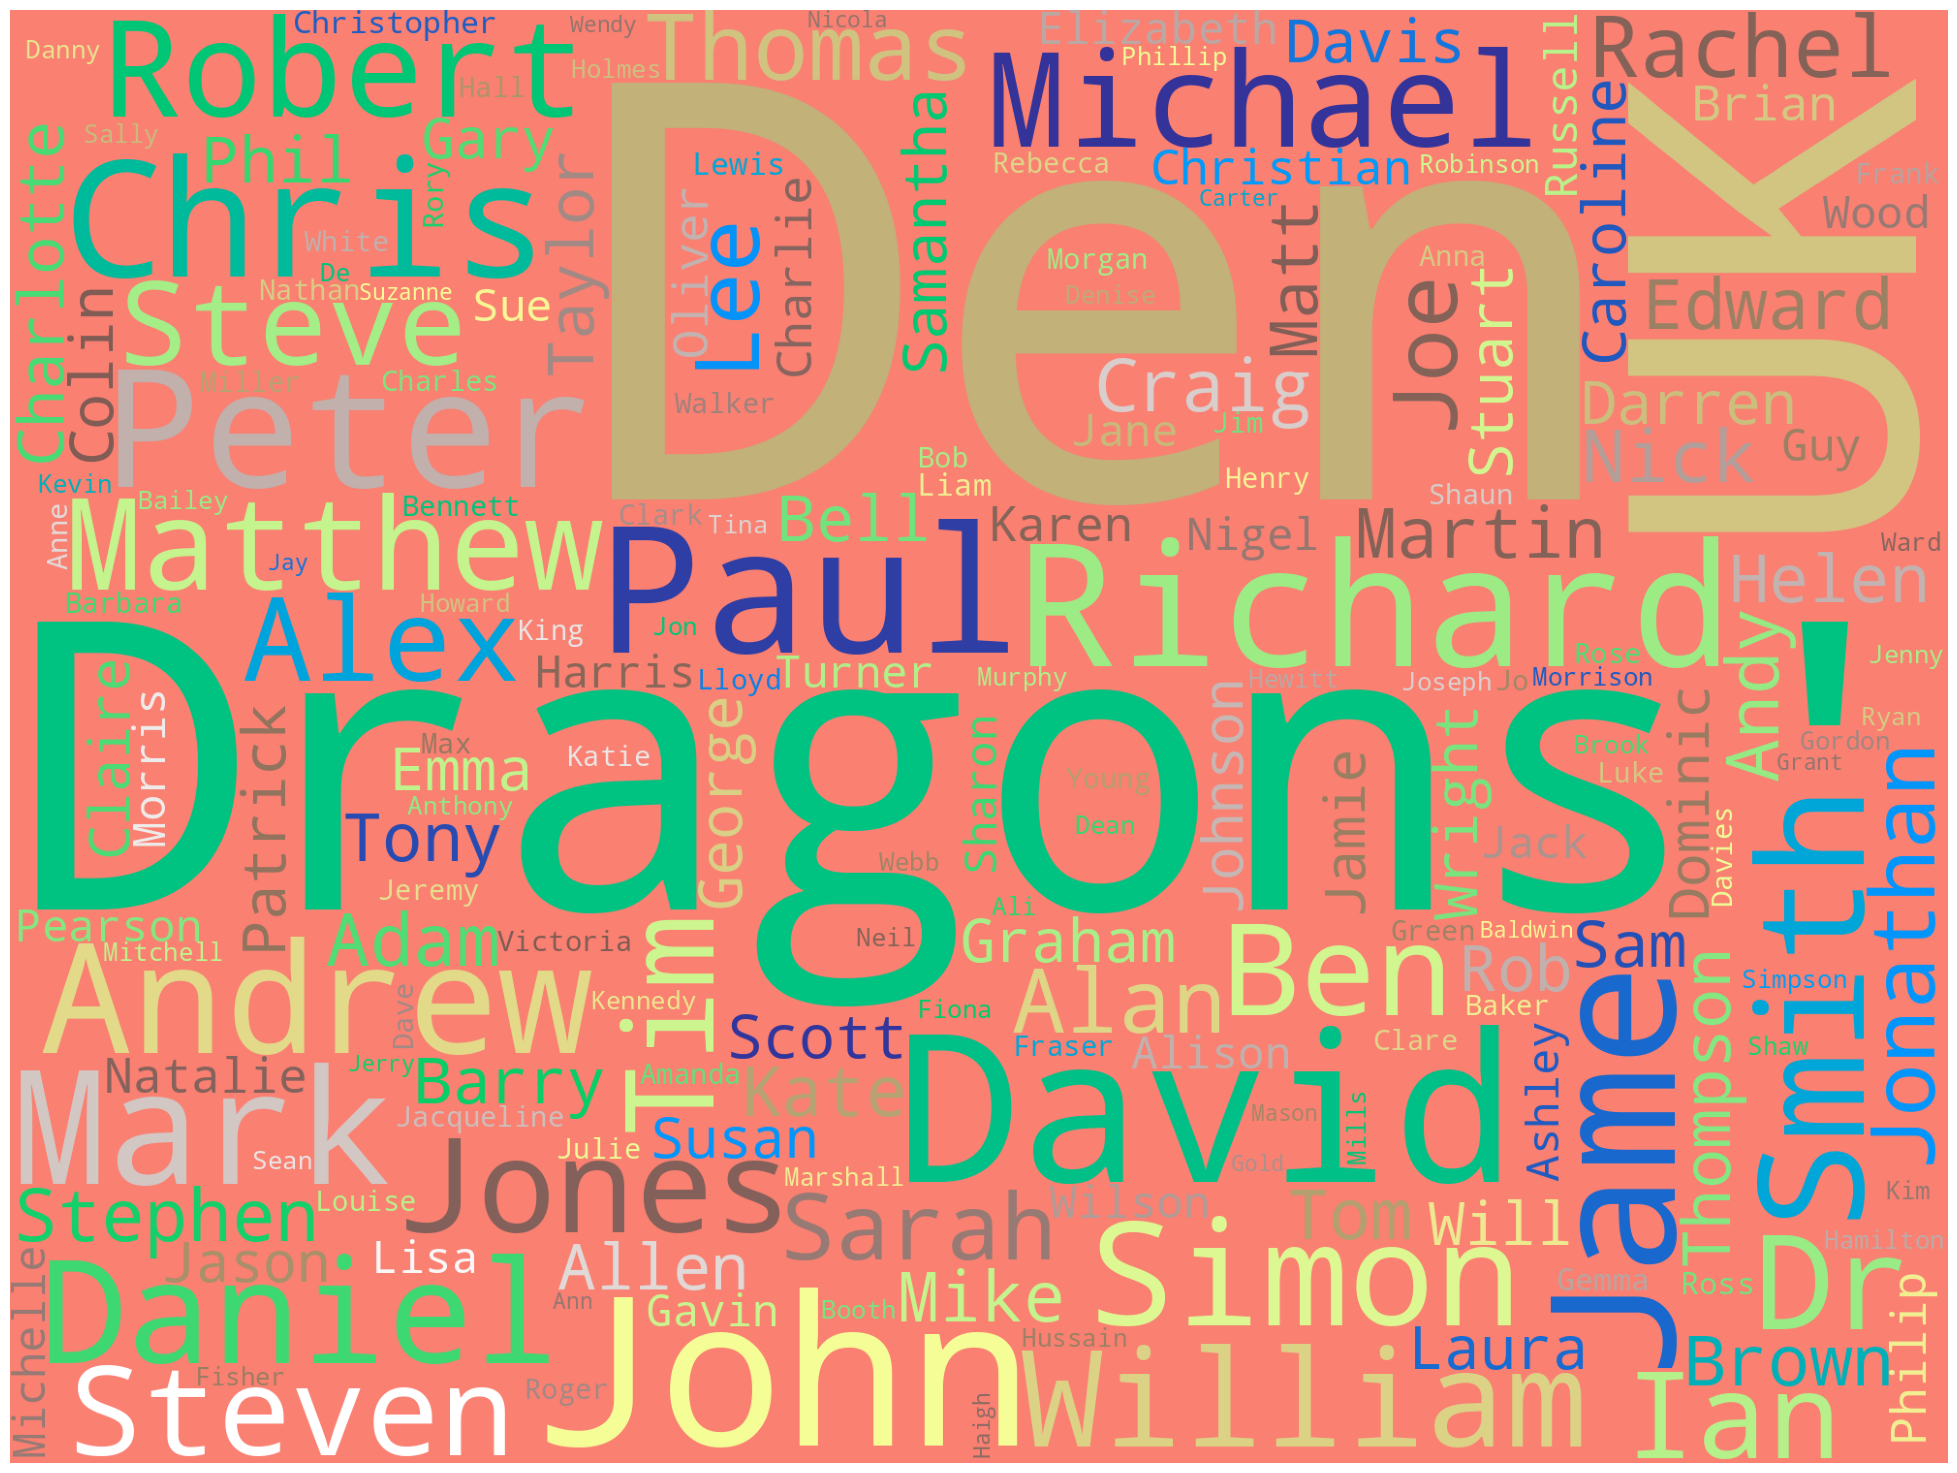

In [79]:
# Word cloud based on Pitcher name
text = " Dragons' Den UK ".join(cat for cat in dragons_den['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [80]:
# Some companies got more amount than they asked/expected
print(dragons_den.loc[dragons_den['Original Ask Amount'] < dragons_den["Total Deal Amount"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Original Ask Amount'] < dragons_den["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    8
dtype: int64


Season Number                Startup Name  Original Ask Amount  \
348               6                   Neurotica              56000.0   
378               6  GuyPortelliSculptureStudio              70000.0   
391               6                     TinyBox              53000.0   
466               7                  MotorMouse             100000.0   
880              13               TimberkitsLtd              25000.0   
1066             16            LookAfterMyBills              90000.0   
1278             19               TheLittleLoop              75000.0   
1285             19         LittleHoppabySophie              75000.0   

      Total Deal Amount  
348             75000.0  
378             80000.0  
391             60000.0  
466            120000.0  
880             40000.0  
1066           120000.0  
1278           140000.0  
1285           100000.0

In [81]:
# # No company not diluted/gave their company equity more than they initially offered/expected
# dragons_den.loc[dragons_den['Original Offered Equity'] < dragons_den["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

In [82]:
# Below companies got the same valuation they requested
print(dragons_den.loc[dragons_den['Valuation Requested'] == dragons_den["Deal Valuation"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Valuation Requested'] == dragons_den["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    207
dtype: int64


Season Number     Startup Name  Valuation Requested  Deal Valuation
8                 1         Umbrolly             375000.0        375000.0
12                1       GrailsLtd1             300000.0        300000.0
27                1        LeBeanock             110204.0        110204.0
60                1  VisualTalentLtd             437500.0        437500.0
67                2       SquareMile             375000.0        375000.0
...             ...              ...                  ...             ...
1465             22          SnoapHQ             666667.0        666667.0
1466             22      KittMedical            1071429.0       1071429.0
1467             22      GoodWashDay             200000.0        200000.0
1469             22      Azio Beauty            1000000.0       1000000.0
1470             22            Prsnt             600000.0        600000.0

[207 rows x 4 columns]

In [83]:
# 8 companies got more valuation than they pitched
print(dragons_den.loc[dragons_den['Valuation Requested'] < dragons_den["Deal Valuation"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Valuation Requested'] < dragons_den["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    8
dtype: int64


Season Number                Startup Name  Valuation Requested  \
348               6                   Neurotica             160000.0   
378               6  GuyPortelliSculptureStudio             280000.0   
391               6                     TinyBox             132500.0   
466               7                  MotorMouse             250000.0   
880              13               TimberkitsLtd              83333.0   
1066             16            LookAfterMyBills            3000000.0   
1278             19               TheLittleLoop             300000.0   
1285             19         LittleHoppabySophie             166667.0   

      Deal Valuation  
348         214286.0  
378         320000.0  
391         150000.0  
466         300000.0  
880         133333.0  
1066       4000000.0  
1278        560000.0  
1285        222222.0

In [84]:
# Episodes which got most TRP
print("Maximum viewership in UK:", dragons_den['UK Viewership'].max(), "\n")
print(dragons_den.loc[dragons_den['UK Viewership']>=dragons_den['UK Viewership'].max()-0.1][["Season Number","Episode Number","Startup Name","UK Viewership"]].head(25).sort_values("UK Viewership",ascending=False).to_string(index=False))

Maximum viewership in UK: 4.39 

 Season Number  Episode Number     Startup Name  UK Viewership
             9               1      DustElimin8           4.39
             9               1            Egglu           4.39
             9               1           Gloven           4.39
             9               1  HumanCannonball           4.39
             9               1     MirujiHealth           4.39
             9               1 PloughcroftSolar           4.39
             9               1   ThePresentClub           4.39
             9               1        WarmaHorn           4.39
            20               1  CarriedbyFarino           4.29
            20               1         DragDiva           4.29
            20               1   PsychicSisters           4.29
            20               1            Tabuu           4.29
            20               1   TempleWellness           4.29


In [85]:
# Episodes which got least TRP
print("Minimum viewership in United Kingdom:", dragons_den['UK Viewership'].min(), "\n")
print(dragons_den.loc[dragons_den['UK Viewership']<=dragons_den['UK Viewership'].min()+0.05][["Season Number","Episode Number","Startup Name","UK Viewership"]].head(30).sort_values("UK Viewership").to_string(index=False))

Minimum viewership in United Kingdom: 1.63 

 Season Number  Episode Number              Startup Name  UK Viewership
            10               9             Pro-TecCovers           1.63
            10               9         TheOvenDoorShield           1.63
            10               9                  Snowmule           1.63
            10               9             ExpertAnswers           1.63
            10               9         KarumaInnovations           1.63
            10               9                      Nebo           1.63
            10               9               PWMMediaLtd           1.63
            10               9       PurepotionsSkincare           1.63
            10              11                      P4CK           1.65
            10              11                  myBunjee           1.65
            10              11                ItsolesLtd           1.65
            10              11                     CarBQ           1.65
            10     

Multiple Entrepreneurs
0    930
1    543
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    63%
1    37%
Name: proportion, dtype: object


<Axes: ylabel='count'>

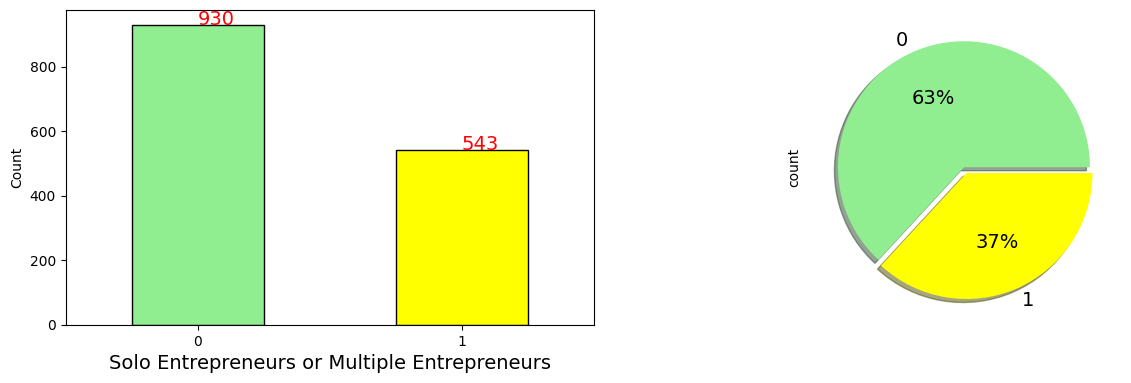

In [86]:
# Solo or multiple Entrepreneurs ?
print(dragons_den['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(dragons_den['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
dragons_den["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(dragons_den["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
dragons_den["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

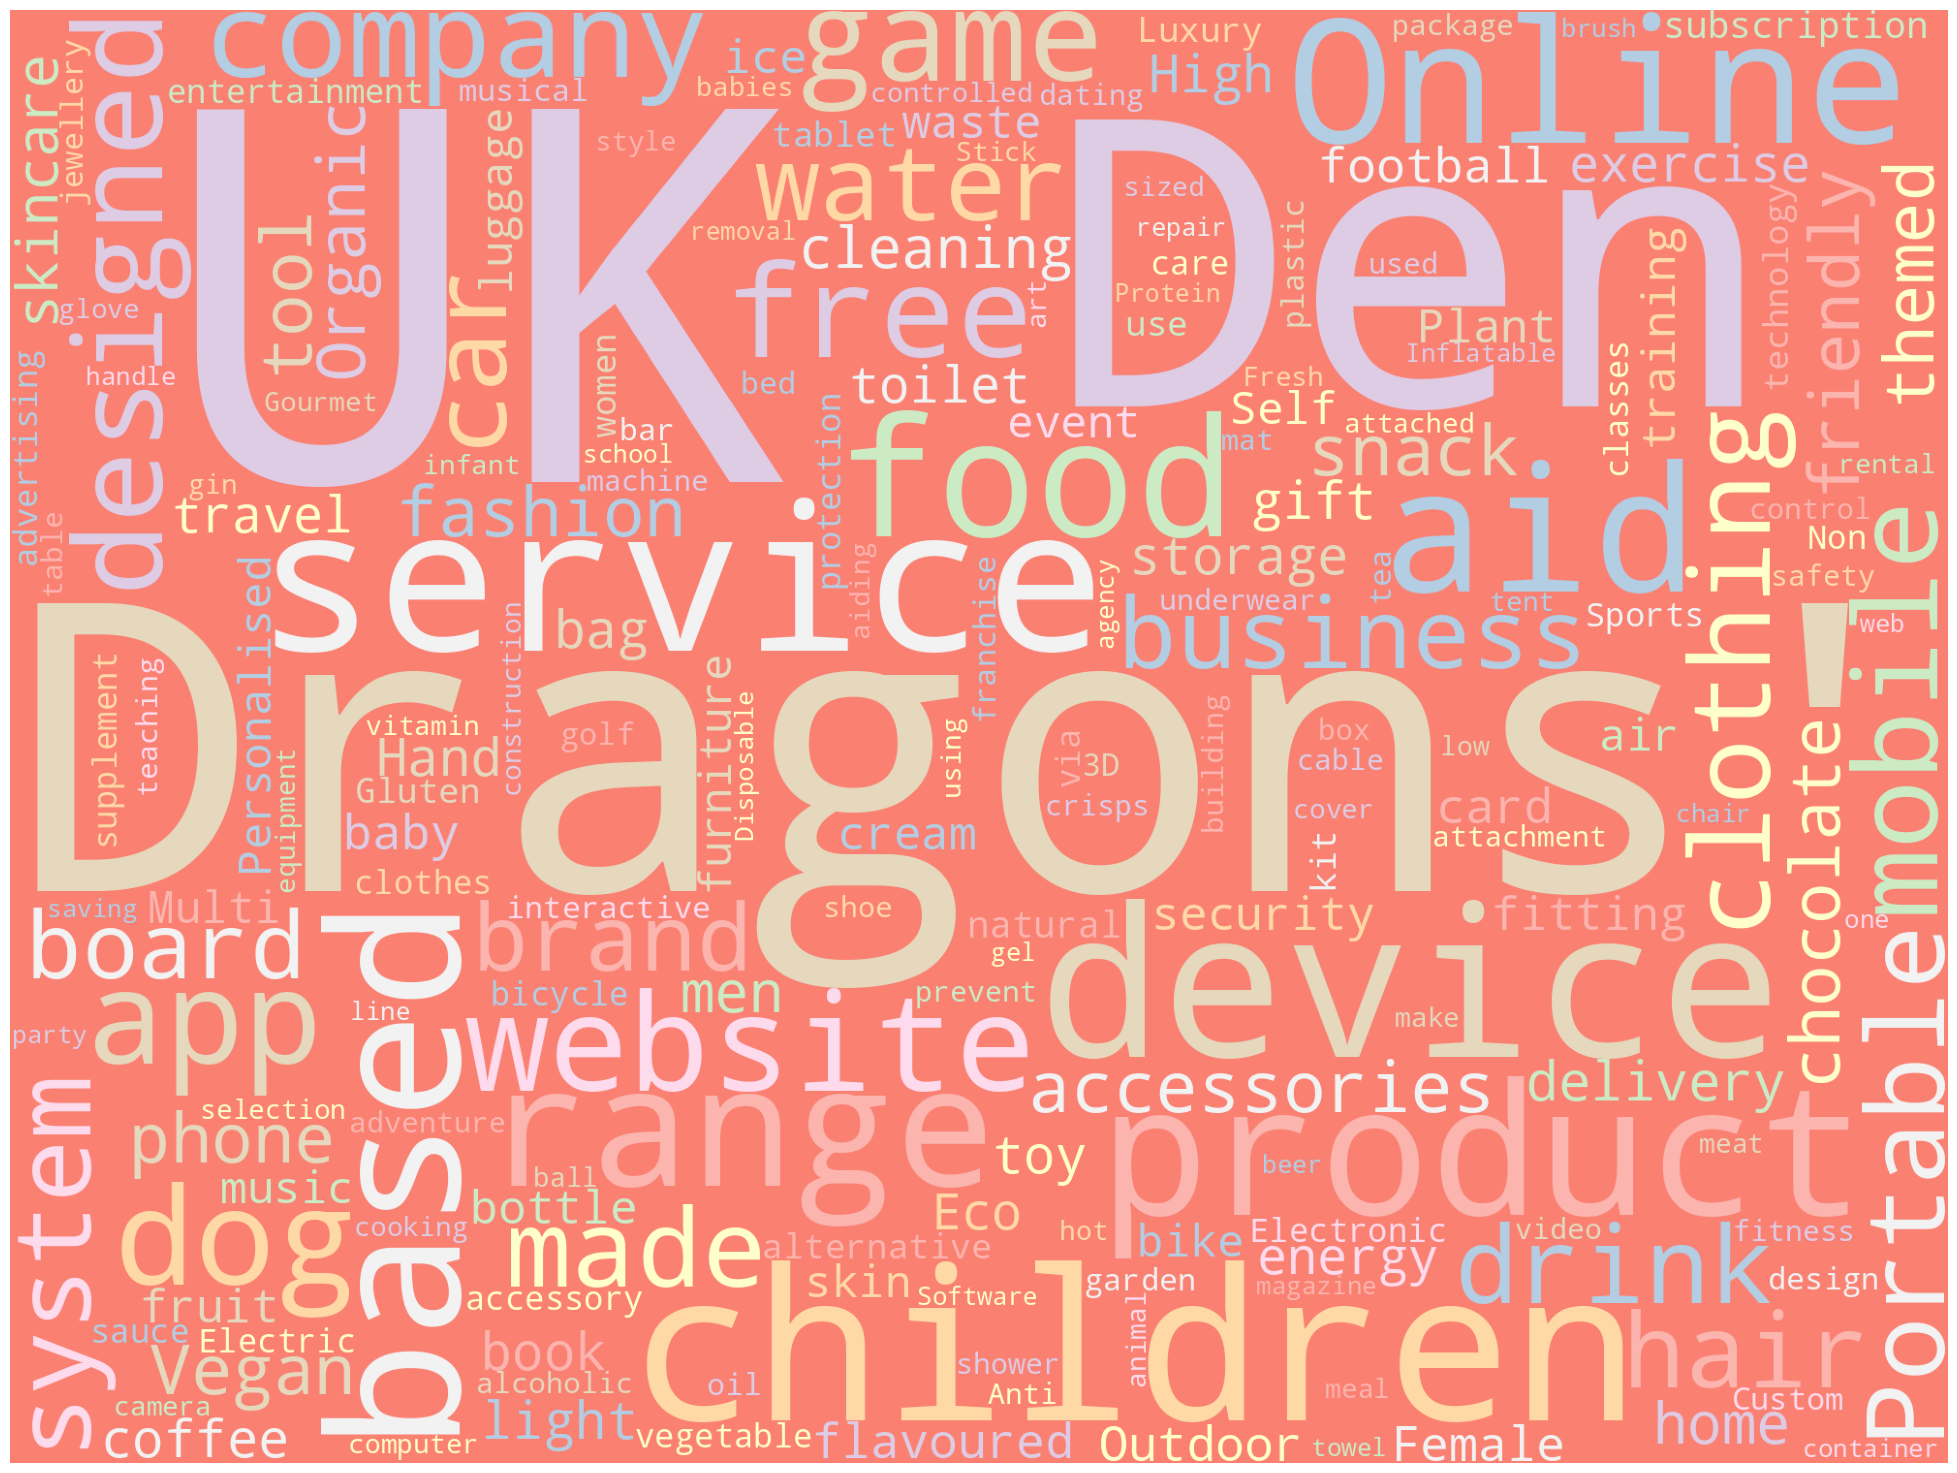

In [87]:
# Word cloud based on Business Description of startups came in all seasons
text = " Dragons' Den UK ".join(cat for cat in dragons_den.loc[dragons_den['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [88]:
# Correlation matrix
dragons_den.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [89]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.3
# matplotlib version: 3.7.2
# seaborn version: 0.12.2
# plotly version: 5.24.1

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.7.2
seaborn version: 0.12.2
plotly version: 5.24.1


In [90]:
dragons_den.loc[(dragons_den['Deal Successful'] == 1) & (dragons_den['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [91]:
dragons_den.loc[(dragons_den['Deal Successful'] == 1) & (dragons_den['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [92]:
dragons_den.loc[(dragons_den['Deal Successful'] == 1) & (dragons_den['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [93]:
dragons_den.loc[(dragons_den['Deal Successful'] == 1) & (dragons_den['Number of Dragons in Deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [94]:
dragons_den.loc[(dragons_den['Deal Successful'] == 1) & (dragons_den['Investment Amount Per Dragon'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [95]:
dragons_den.loc[(dragons_den['Deal Successful'] == 1) & (dragons_den['Equity Per Dragon'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [96]:
dragons_den.loc[round(dragons_den['Total Deal Amount'].fillna(0),1) != round(dragons_den['Peter Jones Investment Amount'].fillna(0) + dragons_den['Deborah Meaden Investment Amount'].fillna(0) + dragons_den['Duncan Bannatyne Investment Amount'].fillna(0) + dragons_den['Theo Paphitis Investment Amount'].fillna(0) + dragons_den['Touker Suleyman Investment Amount'].fillna(0) + dragons_den['Sara Davies Investment Amount'].fillna(0) + dragons_den['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [97]:
dragons_den.loc[round(dragons_den['Total Deal Equity'].fillna(0),1) != round(dragons_den['Peter Jones Investment Equity'].fillna(0) + dragons_den['Deborah Meaden Investment Equity'].fillna(0) + dragons_den['Duncan Bannatyne Investment Equity'].fillna(0) + dragons_den['Theo Paphitis Investment Equity'].fillna(0) + dragons_den['Touker Suleyman Investment Equity'].fillna(0) + dragons_den['Sara Davies Investment Equity'].fillna(0) + dragons_den['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [98]:
dragons_den.loc[(dragons_den['Guest Investment Amount'].notnull()) & (dragons_den['Invested Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [99]:
dragons_den.loc[(dragons_den['Guest Investment Amount'].isnull()) & (dragons_den['Invested Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [100]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] != 0) & (dragons_den['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [101]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] == 0) & (dragons_den['Entrepreneur Names'].notnull() & dragons_den['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [102]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] == 1) & (dragons_den['Entrepreneur Names'].str.contains(' and ')==False)]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [103]:
dragons_den.loc[(dragons_den['Deal Successful'] != 0) & (dragons_den['Deal Successful'] != 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [104]:
dragons_den.loc[(dragons_den['Deal Successful'] == 0) & (dragons_den['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [105]:
dragons_den.loc[(dragons_den['Pitchers Gender'] == 'Mixed Team') & (dragons_den['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [106]:
dragons_den.loc[(dragons_den['Deal Successful'] == 0) & (dragons_den['Invested Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [107]:
dragons_den.loc[dragons_den['Total Deal Amount'] < dragons_den["Loan"]]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [108]:
dragons_den.loc[(dragons_den['Accepted Offer'].isnull()) & (dragons_den['Number of Dragons in Deal'] >= 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [109]:
dragons_den.loc[(dragons_den['Received Offer'] == 1) & (dragons_den['Accepted Offer'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [110]:
dragons_den.loc[(dragons_den['Received Offer'] == 0) & (dragons_den['Accepted Offer'].notnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [111]:
dragons_den.loc[(dragons_den['Received Offer'] != 0) & (dragons_den['Received Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]

In [112]:
dragons_den.loc[(dragons_den['Accepted Offer'] != 0) & (dragons_den['Accepted Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Startup Name, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, UK Viewership, Channel Name, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Deal Successful, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 56 columns]